In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from qetpy.utils import lowpassfilter 
from qetpy import autocuts
import cdms
#from CDMSDataCatalog import CDMSDataCatalog
import scipy.optimize as optimize
import matplotlib as mpl
import pickle as pkl
import os, sys
import ROOT as rt
import seaborn as sns
import operator as op

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 96 from PyObject
/usr/local/lib/python3.8/dist-packages/awkward0/__init__.py:8: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(numpy.__version__) < distutils.version.LooseVersion("1.13.1"):
/data/chocula/test_cdmsbats/root_install/lib/cppyy/__init__.py:72: DeprecationWarning: invalid escape sequence \d
  if re.match('^libcppyy_backend\d_\d$', lib_name):


Welcome to JupyROOT 6.24/06


In [2]:
#base = '/data/chocula/pandey/data_processing/rq'
base = '/data/chocula/spa-u-cdmssoft/rq'

#series = ['07240208_1548']#,'07240206_1832']
series=['07240206_1402']
#
filePath = []

for ser in series:
    
    fp = '%s/%s/umn_%s_10Dumps.root'%(base,ser,ser)#F0001.root'%(base,ser,ser)
    if(os.path.exists(fp)):
        print(ser,' : ',fp)
        filePath.append(fp)
    else:
        print('not found: ',fp)

os.path.exists('/data/chocula/spa-u-cdmssoft/rq')

07240206_1402  :  /data/chocula/spa-u-cdmssoft/rq/07240206_1402/umn_07240206_1402_10Dumps.root


True

In [3]:
#dets = ['Z1','Z4']
dets = ['Z1']
zips = {
    'Z1' : 'zip1',
    'Z2' : 'zip2',
    'Z3' : 'zip3',
    'Z4' : 'zip4',
    'Z5' : 'zip5',
    'Z6' : 'zip6'
}
RQ = []

for idx,key in enumerate(series):
    t = {}
    for i,det in enumerate(dets):
        t[det] = uproot.open(filePath[idx])['rqDir/%s'%(zips[det])]
    RQ.append(t)

eventTree=[]
for idx,key in enumerate(series):
    eventTree.append(uproot.open(filePath[idx])['rqDir/eventTree']) 

print('Done!')

Done!


In [4]:
#uproot.open(filePath[0])['rqDir/eventTree']
eventTree[0].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
EventCategory        | double                   | AsDtype('>f8')
EventNumber          | double                   | AsDtype('>f8')
EventTime            | double                   | AsDtype('>f8')
EventType            | double                   | AsDtype('>f8')
GPS_d                | double                   | AsDtype('>f8')
GPS_h                | double                   | AsDtype('>f8')
GPS_m                | double                   | AsDtype('>f8')
GPS_s                | double                   | AsDtype('>f8')
GPS_status           | double                   | AsDtype('>f8')
GPS_ticks            | double                   | AsDtype('>f8')
GPS_y                | double                   | AsDtype('>f8')
LiveTime             | double                   | AsDtype('>f8')
SeriesNumber         | double                   | AsDtype(

In [5]:
RQ[0]['Z1'].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
DetType              | double                   | AsDtype('>f8')
Empty                | double                   | AsDtype('>f8')
PAINTall             | double                   | AsDtype('>f8')
PAOFamps             | double                   | AsDtype('>f8')
PAOFamps0            | double                   | AsDtype('>f8')
PAOFchisq            | double                   | AsDtype('>f8')
PAOFchisqLF          | double                   | AsDtype('>f8')
PAOFdelay            | double                   | AsDtype('>f8')
PATFPamp             | double                   | AsDtype('>f8')
PATFPchisq           | double                   | AsDtype('>f8')
PATFPeflag           | double                   | AsDtype('>f8')
PATFPint             | double                   | AsDtype('>f8')
PATFPoffset          | double                   | AsDtype(

In [6]:
#Get RQs from processed files
channels = ['PA','PB','PC','PD','PE','PF','PT']



channels = ['PA','PB','PC','PD','PE','PF','PT']
quantity = ['OFamps','OFamps0' ,'INTall','OFchisq','bs','WKf40','WKf20','WKf80','WKr80','WKr50','WKr20']

#series=['23231024_231640']
OFamps={}
OFamps0={}
OFchiq={}
OFINTall={}
bs={}
OFdelay={}

WKr10={}
WKr20={}
WKr30={}
WKr40={}
WKr50={}
WKr60={}
WKr70={}
WKr80={}
WKr90={}
WKr95={}
WKr100={}
WKf95={}
WKf90={}
WKf80={}
WKf40={}
WKf20={}


for i,key in enumerate(series): # for each series
    ta={}
    ta0={}
    tc={}
    tint={}
    tbs={}
    td={}
    twr10={}
    twr20={}
    twr30={}
    twr40={}
    twr50={}
    twr60={}
    twr70={}
    twr80={}
    twr90={}
    twr95={}
    twr100={}
    twf95={}
    twf90={}
    twf80={}
    twf40={}
    twf20={}
    for j,det in enumerate(dets):     # for each detector
        tta={}
        tta0={}
        ttc={}
        ttint={}
        ttbs={}
        ttd={}
        
        ttwr10={}
        ttwr20={}
        ttwr30={}
        ttwr40={}
        ttwr50={}
        ttwr60={}
        ttwr70={}
        ttwr80={}
        ttwr90={}
        ttwr95={}
        ttwr100={}
        ttwf95={}
        ttwf90={}
        ttwf80={}
        ttwf40={}
        ttwf20={}
#        ttwf40={}
#        ttwr40={}
#        ttwr100={}
#        ttwr20={}
#        ttwf80={}
#        ttwr80={}
#        ttwr50={}
#        ttwf20={}
        
        print('Detector = ',det)
        for c in channels:                # for each channel
            
#             if(det == 'Z3' and c == 'PAS1'):
#                 print('\tSkipping Z3-PAS1...')
#                 continue
            #print('\t chan = ',c)
            tta[c]=(RQ[i][det][c+"OFamps"].array(library='np'))
            
            tta0[c]=(RQ[i][det][c+"OFamps0"].array(library='np'))
            ttc[c]=(RQ[i][det][c+"OFchisq"].array(library='np'))
            ttint[c]=(RQ[i][det][c+"INTall"].array(library='np'))
            ttd[c]=(RQ[i][det][c+"OFdelay"].array(library='np'))
            
            ttwr10[c]=(RQ[i][det][c+"WKr10"].array(library='np'))
            ttwr20[c]=(RQ[i][det][c+"WKr20"].array(library='np'))
            ttwr30[c]=(RQ[i][det][c+"WKr30"].array(library='np'))
            ttwr40[c]=(RQ[i][det][c+"WKr40"].array(library='np'))
            ttwr50[c]=(RQ[i][det][c+"WKr50"].array(library='np'))
            ttwr60[c]=(RQ[i][det][c+"WKr60"].array(library='np'))
            ttwr70[c]=(RQ[i][det][c+"WKr70"].array(library='np'))
            ttwr80[c]=(RQ[i][det][c+"WKr80"].array(library='np'))
            ttwr90[c]=(RQ[i][det][c+"WKr90"].array(library='np'))
            ttwr95[c]=(RQ[i][det][c+"WKr95"].array(library='np'))
            ttwr100[c]=(RQ[i][det][c+"WKr100"].array(library='np'))
            ttwf95[c]=(RQ[i][det][c+"WKf95"].array(library='np'))
            ttwf90[c]=(RQ[i][det][c+"WKf90"].array(library='np'))
            ttwf80[c]=(RQ[i][det][c+"WKf80"].array(library='np'))
            ttwf40[c]=(RQ[i][det][c+"WKf40"].array(library='np'))
            ttwf20[c]=(RQ[i][det][c+"WKf20"].array(library='np'))
            
#             tta[c]=(RQ[i][det].array(c+"OFamps"))
#             tta0[c]=(RQ[i][det].array(c+"OFamps0"))
#             ttc[c]=(RQ[i][det].array(c+"OFchisq"))
#             ttint[c]=(RQ[i][det].array(c+"INTall"))
#             ttd[c]=(RQ[i][det].array(c+"OFdelay"))
#             ttwf40[c]=(RQ[i][det].array(c+"WKf40"))
#             ttwr40[c]=(RQ[i][det].array(c+"WKr40"))
#             ttwr20[c]=(RQ[i][det].array(c+"WKr20"))           
            if(c!='PT'):
                #ttbs[c]=(RQ[i][det].array(c+"bs"))
                ttbs[c]=(RQ[i][det][c+"bs"].array(library='np'))
        
        ta[det] = tta
        ta0[det] = tta0
        tc[det] = ttc
        tint[det] = ttint
        td[det] = ttd
        
        twr10[det] = ttwr10
        twr20[det] = ttwr20
        twr30[det] = ttwr30
        twr40[det] = ttwr40
        twr50[det] = ttwr50
        twr60[det] = ttwr60
        twr70[det] = ttwr70
        twr80[det] = ttwr80
        twr90[det] = ttwr90
        twr95[det] = ttwr95
        twr100[det] = ttwr100
        twf95[det] = ttwf95
        twf90[det] = ttwf90
        twf80[det] = ttwf80
        twf40[det] = ttwf40
        twf20[det] = ttwf20
        tbs[det] = ttbs
    
    OFamps[key]=ta
    OFamps0[key]=ta0
    OFchiq[key]=tc
    OFINTall[key]=tint
    OFdelay[key]=td
    bs[key]=tbs
    
    WKr10[key]=twr10
    WKr20[key]=twr20
    WKr30[key]=twr30
    WKr40[key]=twr40
    WKr50[key]=twr50
    WKr60[key]=twr60
    WKr70[key]=twr70
    WKr80[key]=twr80
    WKr90[key]=twr90
    WKr95[key]=twr95
    WKr100[key]=twr100
    WKf95[key]=twf95
    WKf90[key]=twf90
    WKf80[key]=twf80
    WKf40[key]=twf40
    WKf20[key]=twf20
    
        
    print('Done for %s..'%(key))
print('all done')

Detector =  Z1
Done for 07240206_1402..
all done


In [7]:
# Get event info from processed files
#eventTree = ['EventCategory','EventTime','EventNumber','EventType']
EventNumber=[]
EventCategory=[]
EventTime=[]
EventType=[]
# TriggerTime=[]
# TriggerType=[]
# TrigDet=[]

for i,key in enumerate(series):
    EventNumber.append(eventTree[i]['EventNumber'].array(library='np'))
    EventCategory.append(eventTree[i]['EventCategory'].array(library='np'))
    EventTime.append(eventTree[i]['EventTime'].array(library='np'))
    EventType.append(eventTree[i]['EventType'].array(library='np'))
    
#     TriggerTime.append(eventTree[i]['TriggerTime'].array(library='np'))
#     TriggerType.append(eventTree[i]['TriggerType'].array(library='np'))
    
#     TrigDet.append(eventTree[i]['TrigDet'].array(library='np'))
    
    print('%s loaded'%(key))
print('Done!')

07240206_1402 loaded
Done!


In [8]:
det = 'Z1'
for key in series:
    t = {}
    temp = OFamps[key]['Z1']['PA']
    for c in channels:
        if(c == 'PE' or c == 'PA'):
            continue
    temp += OFamps[key]['Z1'][c]
    t[key] = temp
PT = temp

In [9]:
mask = (EventCategory[idx] == 1)
idx = 0
key = series[idx]
det = 'Z1'
zero_thresh=dict() # zero-point energy
for c in ["PA","PB","PC","PD","PF"]:
    zero_thresh[c]=np.std(OFamps0[key]["Z1"][c][mask])

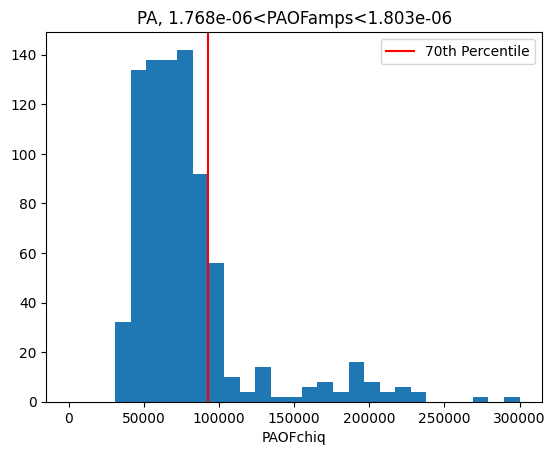

654358 5.04e-08 2260790.0 790
654358 5.04e-08 2260918.0 918
2515484 5.04e-08 2261654.0 1654
2515484 5.04e-08 2261781.0 1781
3848531 -1.16e-07 2262072.0 2072
3848531 -1.16e-07 2262199.0 2199
1117568 -5.271e-07 2263337.0 3337
834998 -3.356e-07 2263346.0 3346
3600274 -5.737e-07 2263389.0 3389
1117568 -5.271e-07 2263465.0 3465
834998 -3.356e-07 2263474.0 3474


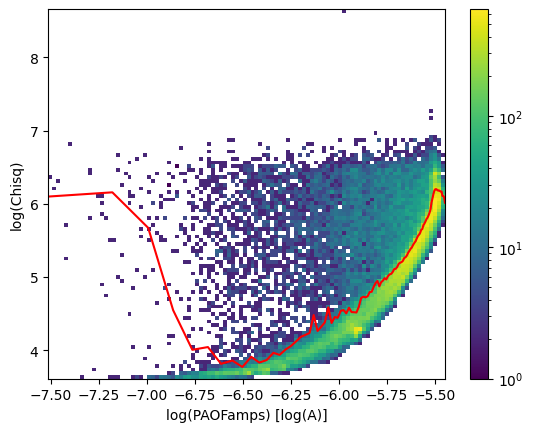

535036.7770800992
917719.4807923931


In [11]:
# A x0: 6.20750452e-07 A, 7.77438468e-07 A, 2.29736139e-06 A
# B x0: 4.44878492e-08 A, 5.59690132e-08 A, 1.89410191e-07 A
# C x0: 6.21910809e-08 A, 7.32473858e-08 A, 2.14053744e-07 A
# D x0: 5.51238192e-08 A, 6.96326796e-08 A, 2.35658947e-07 A
# F x0: 1.16970912e-07 A, 1.43931655e-07 A, 3.82778664e-07 A
idx = 0
key = series[idx]
c = 'PA'
det = 'Z1'
mask = (EventCategory[idx] == 0) & (OFamps[key]['Z1'][c] > 0.) & (OFamps[key]['Z1'][c]>3*10**(-8)) \
    & (OFamps[key]['Z1'][c] > 0.)
x = OFamps[key]['Z1'][c][mask]
y = OFchiq[key]['Z1'][c][mask]
x70=np.array([])
y70=[]
i=0
for xval in np.arange(np.min(x),np.max(x),(np.max(x)-np.min(x))/100):
    y70.append(np.quantile(OFchiq[key]['Z1'][c][(OFamps[key]['Z1'][c] > xval)&(OFamps[key]['Z1'][c] < xval+(np.max(x)-np.min(x))/100)],.7))
    #y70.append(np.median(OFchiq[key]['Z1'][c][(OFamps[key]['Z1'][c] > xval)&(OFamps[key]['Z1'][c] < xval+(np.max(x)-np.min(x))/100)])+2*np.std(OFchiq[key]['Z1'][c][(OFamps[key]['Z1'][c] > xval)&(OFamps[key]['Z1'][c] < xval+(np.max(x)-np.min(x))/100)]))
    x70=np.append(x70,xval)
    i+=1
    if i==50:
        plt.hist(OFchiq[key]['Z1'][c][(OFamps[key]['Z1'][c] > xval)&(OFamps[key]['Z1'][c] < xval+(np.max(x)-np.min(x))/100)],bins=np.linspace(0,0.3e6,30))
        plt.title('P'+c[-1]+", "+str(round(xval,9))+'<P'+c[-1]+"OFamps<"+str(round(xval+(np.max(x)-np.min(x))/100,9)))
        plt.xlabel("PAOFchiq")
        plt.axvline(np.quantile(OFchiq[key]['Z1'][c][(OFamps[key]['Z1'][c] > xval)&(OFamps[key]['Z1'][c] < xval+(np.max(x)-np.min(x))/100)],.70),c="red",label="70th Percentile")#+2*np.std(OFchiq[key]['Z1'][c][(OFamps[key]['Z1'][c] > xval)&(OFamps[key]['Z1'][c] < xval+(np.max(x)-np.min(x))/100)]),c="red")
        #plt.xscale("log")
        plt.legend()
        plt.show()
n=0
for i in range(len(OFamps[key]['Z1'][c])):
    if OFamps[key]['Z1'][c][i]<=1e-7:
        if OFchiq[key]['Z1'][c][i]>=1e5:
            if n<=10:
                print(round(OFchiq[key]['Z1'][c][i]),round(OFamps[key]['Z1'][c][i],10),EventNumber[0][i],i)
                n+=1
y70=np.array(y70)
"""
fig,ax=plt.subplots(1,1)
ax.scatter(x.tolist(),y.tolist(),alpha=0.3)#,bins=(np.linspace(6.1e-7,6.3e-7,100),100))#,alpha=0.5)
ax.plot(x70,y70,c="red")
plt.xscale('log')
plt.xlabel('P'+c[-1]+'OFamps [A] ')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.title("P"+c[-1]+"OFamps to Chi-Squared")
plt.yscale('log')
plt.ylabel('Chisq')
#plt.axvline(3*zero_thresh[c],c="red")
#plt.axvline(6.24526684e-07,c="green")
#plt.axvline(7.77438468e-07,c="green")
#plt.axvline(2.29736139e-06,c="green")
#plt.axhline(np.quantile(OFchiq[key]['Z1']['PA'],0.5),c="red")
#plt.xlim(6.1e-7,6.3e-7)
#plt.ylim(0.5*10**4,5*10**4)
plt.show()
"""
plt.hist2d(np.log10(x),np.log10(y),bins=100,norm="log")
plt.plot(np.log10(x70),np.log10(y70),c="red")
plt.xlabel('log(P'+c[-1]+'OFamps) [log(A)]')
plt.ylabel('log(Chisq)')
plt.colorbar()
plt.show()
print(np.mean(OFchiq[key]['Z1'][c][(OFamps[key]['Z1'][c] > 1e-7)&(OFamps[key]['Z1'][c] < 1e-7+(np.max(x)-np.min(x))/100)]))
print(np.std(OFchiq[key]['Z1'][c][(OFamps[key]['Z1'][c] > 1e-7)&(OFamps[key]['Z1'][c] < 1e-7+(np.max(x)-np.min(x))/100)]))

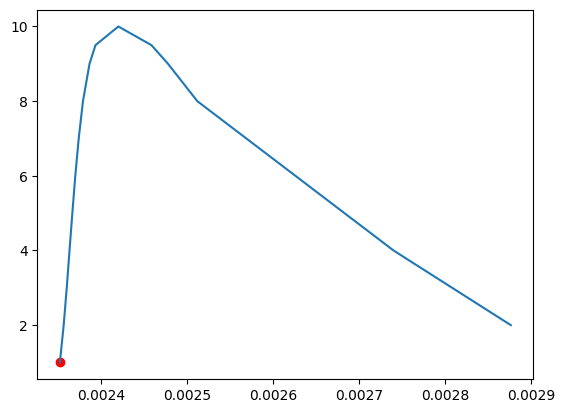

In [57]:
i=264
plt.scatter([WKr10[key]['Z1']["PB"][i]],[1],c="red")
plt.plot([WKr10[key]['Z1']["PB"][i],
          WKr20[key]['Z1']["PB"][i],
          WKr30[key]['Z1']["PB"][i],
          WKr40[key]['Z1']["PB"][i],
          WKr50[key]['Z1']["PB"][i],
          WKr60[key]['Z1']["PB"][i],
          WKr70[key]['Z1']["PB"][i],
          WKr80[key]['Z1']["PB"][i],
          WKr90[key]['Z1']["PB"][i],
          WKr95[key]['Z1']["PB"][i],
          WKr100[key]['Z1']["PB"][i],
          WKf95[key]['Z1']["PB"][i],
          WKf90[key]['Z1']["PB"][i],
          WKf80[key]['Z1']["PB"][i],
          WKf40[key]['Z1']["PB"][i],
          WKf20[key]['Z1']["PB"][i]],
         [1,2,3,4,5,6,7,8,9,9.5,10,9.5,9,8,4,2])
#plt.axvline(0)
plt.show()

In [14]:
def DynamicChiSquare(percentile=0.7):
    mask=np.array([True]*len(OFamps[key]['Z1']["PA"]))
    for c in ["PA","PB","PC","PD","PF"]:
        w=(np.max(OFamps[key]['Z1'][c])-np.min(OFamps[key]['Z1'][c]))/50
        for i in range(len(OFamps[key]['Z1']["PA"])):
            x=OFamps[key]["Z1"][c]
            left=x[i]-w
            right=x[i]+w
            if OFchiq[key]["Z1"][c][i]>np.quantile(OFchiq[key]["Z1"][c][(x>left)&(x<right)],percentile):
                mask[i]=False
#                if np.quantile(x[(x>left)&(x<right)],percentile)==np.quantile(x,percentile):
#                    print(i)
            if i%5000==0:
                print(c,i)
    return mask
def c_mask(c): 
    return (EventCategory[idx] == 0) & (OFamps[key]['Z1']["PT"] > 0.) & \
    (OFchiq[key]['Z1']["PA"] < np.quantile(OFchiq[key]['Z1']["PA"],0.7)) & \
    (OFchiq[key]['Z1']["PB"] < np.quantile(OFchiq[key]['Z1']["PB"],0.7)) & \
    (OFchiq[key]['Z1']["PC"] < np.quantile(OFchiq[key]['Z1']["PC"],0.7)) & \
    (OFchiq[key]['Z1']["PD"] < np.quantile(OFchiq[key]['Z1']["PD"],0.7)) & \
    (OFchiq[key]['Z1']["PF"] < np.quantile(OFchiq[key]['Z1']["PF"],0.7))

In [52]:
dynamic_mask=DynamicChiSquare()

PA 0
PA 5000
PA 10000
PA 15000
PA 20000
PA 25000
PA 30000
PA 35000
PA 40000
PA 45000
PA 50000
PA 55000
PA 60000
PA 65000
PA 70000
PA 75000
PA 80000
PA 85000
PA 90000
PB 0
PB 5000
PB 10000
PB 15000
PB 20000
PB 25000
PB 30000
PB 35000
PB 40000
PB 45000
PB 50000
PB 55000
PB 60000
PB 65000
PB 70000
PB 75000
PB 80000
PB 85000
PB 90000
PC 0
PC 5000
PC 10000
PC 15000
PC 20000
PC 25000
PC 30000
PC 35000
PC 40000
PC 45000
PC 50000
PC 55000
PC 60000
PC 65000
PC 70000
PC 75000
PC 80000
PC 85000
PC 90000
PD 0
PD 5000
PD 10000
PD 15000
PD 20000
PD 25000
PD 30000
PD 35000
PD 40000
PD 45000
PD 50000
PD 55000
PD 60000
PD 65000
PD 70000
PD 75000
PD 80000
PD 85000
PD 90000
PF 0
PF 5000
PF 10000
PF 15000
PF 20000
PF 25000
PF 30000
PF 35000
PF 40000
PF 45000
PF 50000
PF 55000
PF 60000
PF 65000
PF 70000
PF 75000
PF 80000
PF 85000
PF 90000


In [62]:
with open('10DumpMask.pkl', 'wb') as fp:
    pkl.dump(dynamic_mask, fp, protocol=pkl.HIGHEST_PROTOCOL)

In [12]:
with open('10DumpMask.pkl', 'rb') as fp:
    dynamic_mask = pkl.load(fp)

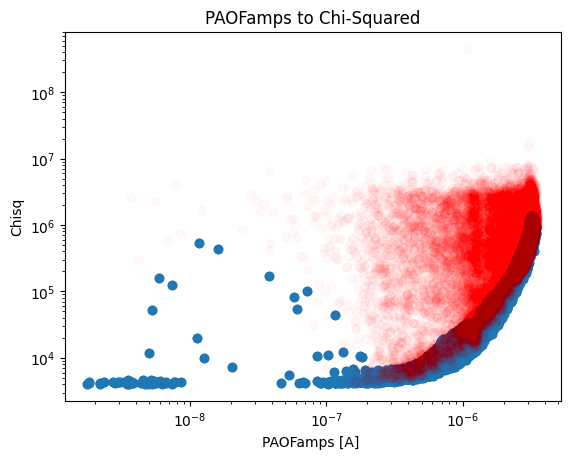

In [14]:
x = OFamps[key]['Z1']["PA"][dynamic_mask]
y = OFchiq[key]['Z1']["PA"][dynamic_mask]
x_evil = OFamps[key]['Z1']["PA"][~dynamic_mask] # EEEEVVVVIIIILLLLLLLL!!!
y_evil = OFchiq[key]['Z1']["PA"][~dynamic_mask]
plt.scatter(x,y,alpha=1)
plt.scatter(x_evil,y_evil,alpha=0.01,c="red")
plt.xscale('log')
plt.xlabel('PAOFamps [A] ')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.title("PAOFamps to Chi-Squared")
plt.yscale('log')
plt.ylabel('Chisq')
plt.show()

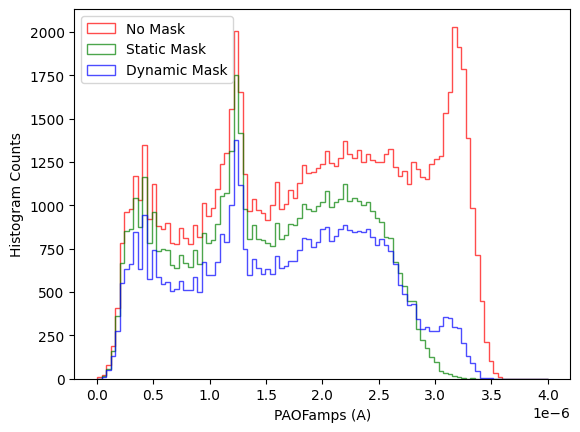

In [15]:
plt.hist(OFamps[key]['Z1']["PA"][mask],bins=np.linspace(0,4e-6,100),histtype="step",color="red",label="No Mask",alpha=0.7)
plt.hist(OFamps[key]['Z1']["PA"][mask&c_mask("")],bins=np.linspace(0,4e-6,100),histtype="step",color="green",label="Static Mask",alpha=0.7)
plt.hist(OFamps[key]['Z1']["PA"][mask&dynamic_mask],bins=np.linspace(0,4e-6,100),histtype="step",color="blue",label="Dynamic Mask",alpha=0.7)
plt.legend()
plt.xlabel("PAOFamps (A)")
plt.ylabel("Histogram Counts")
plt.show()

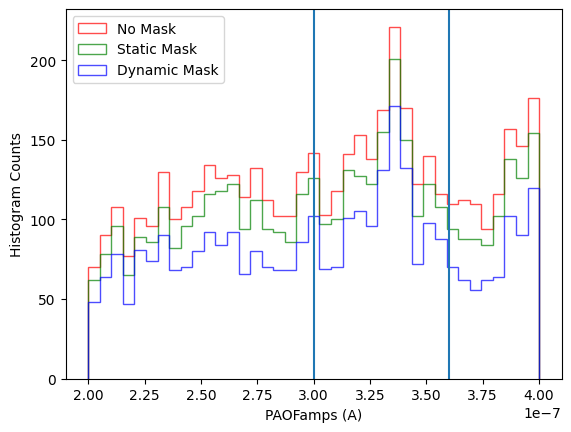

(0.755055786198907, 0.8206403567186116, 1.0443379428518906)

In [34]:
from scipy.optimize import curve_fit
def offset_gaussian(x,a,x0,sigma,b):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))+b
h1=plt.hist(OFamps[key]['Z1']["PA"][mask],bins=np.linspace(2e-7,4e-7,40),histtype="step",color="red",label="No Mask",alpha=0.7)
h2=plt.hist(OFamps[key]['Z1']["PA"][mask&c_mask("")],bins=np.linspace(2e-7,4e-7,40),histtype="step",color="green",label="Static Mask",alpha=0.7)
h3=plt.hist(OFamps[key]['Z1']["PA"][mask&dynamic_mask],bins=np.linspace(2e-7,4e-7,40),histtype="step",color="blue",label="Dynamic Mask",alpha=0.7)
plt.axvline(3e-7)
plt.axvline(3.6e-7)
y1=h1[0];x1=h1[1][:-1]
y2=h2[0];x2=h2[1][:-1]
y3=h3[0];x3=h3[1][:-1]
x14_1=x1[(x1>3e-7) & (x1<3.6e-7)]
x14_2=x2[(x2>3e-7) & (x2<3.6e-7)]
x14_3=x3[(x3>3e-7) & (x3<3.6e-7)]
y14_1=y1[(x1>3e-7) & (x1<3.6e-7)]
y14_2=y2[(x2>3e-7) & (x2<3.6e-7)]
y14_3=y3[(x3>3e-7) & (x3<3.6e-7)]
popt1,pcov = curve_fit(offset_gaussian, x14_1, y14_1, p0=[100,3.3e-7,3.3e-9,50],maxfev=30000)
popt2,pcov = curve_fit(offset_gaussian, x14_2, y14_2, p0=[60,3.3e-7,3.3e-9,50],maxfev=30000)
popt3,pcov = curve_fit(offset_gaussian, x14_3, y14_3, p0=[60,3.3e-7,3.3e-9,40],maxfev=30000)
plt.legend()
plt.xlabel("PAOFamps (A)")
plt.ylabel("Histogram Counts")
#plt.xlim(0,0.7e-6)
plt.show()
popt1[0]/popt1[-1],popt2[0]/popt2[-1],popt3[0]/popt3[-1]

754


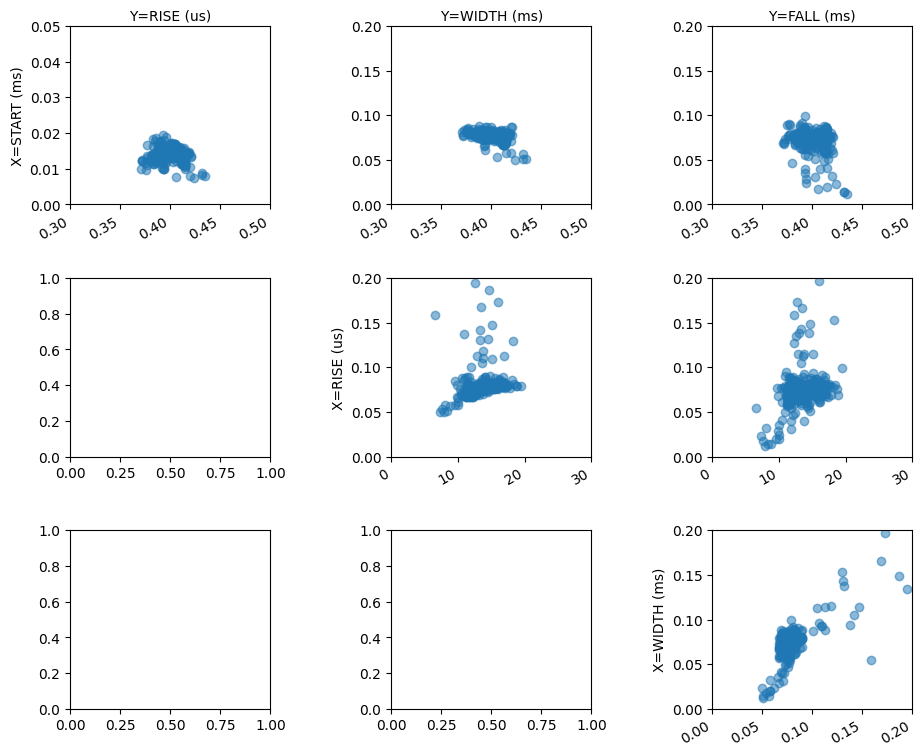

In [10]:
idx = 0
key = series[idx]
c = 'PT'
det = 'Z1'
mask = (EventCategory[idx] == 0) & (OFamps[key]['Z1'][c] > 0.) & (WKr50[key]['Z1'][c]> WKr20[key]['Z1'][c])\
    & (WKf80[key]['Z1'][c]>WKr80[key]['Z1'][c]) & (WKf20[key]['Z1'][c]>WKf40[key]['Z1'][c]) &\
    (OFamps[key]['Z1']['PT']>(2.9*10**(-7)))&(OFamps[key]['Z1']['PT']<(3.1*10**(-7)))
start= WKr20[key]['Z1'][c][mask]
rise = WKr50[key]['Z1'][c][mask]-start
width= WKf80[key]['Z1'][c][mask]-WKr80[key]['Z1'][c][mask]
fall = WKf20[key]['Z1'][c][mask]-WKf40[key]['Z1'][c][mask]
print(len(fall))
smean=np.mean(start);sstd=np.std(start)
rmean=np.mean(rise);rstd=np.std(rise)
wmean=np.mean(width);wstd=np.std(width)
fmean=np.mean(fall);fstd=np.std(fall)
mask2 = (start>(smean-30*sstd)) & (start<(smean+30*sstd)) & (rise>(rmean-30*rstd)) & \
    (rise<(rmean+30*rstd)) & (width>(wmean-30*wstd)) & (width>(wmean+30*wstd)) & (fall>(fmean-30*fstd))\
    & (fall<(fmean+30*fstd))
#start=start[mask2]
#rise=rise[mask2]
#width=width[mask2]
#fall=fall[mask2]

#start=start[mask3]
#rise=rise[mask3]
#width=width[mask3]
#fall=fall[mask3]
fig, axs = plt.subplots(3, 3)

axs[0,0].scatter(start*10**3,rise*10**3,alpha=0.3)
axs[0,0].set_xlabel('Y=RISE (us)')    
axs[0,0].set_ylabel('X=START (ms)')
axs[0,0].set_xlim(0.3,0.5)
axs[0,0].set_ylim(0,0.05)
axs[0,0].xaxis.set_label_position('top') 

axs[0,1].scatter(start*10**3,width*10**3,alpha=0.3)
axs[0,1].set_xlabel('Y=WIDTH (ms)')
axs[0,1].xaxis.set_label_position('top') 
axs[0,1].set_xlim(0.3,0.5)
axs[0,1].set_ylim(0,0.2)

axs[0,2].scatter(start*10**3,fall*10**3,alpha=0.3)
axs[0,2].set_xlabel('Y=FALL (ms)') 
axs[0,2].xaxis.set_label_position('top') 
axs[0,2].set_xlim(0.3,0.5)
axs[0,2].set_ylim(0,0.2)

axs[1,1].scatter(rise*10**6,width*10**3,alpha=0.3)
axs[1,1].set_ylabel('X=RISE (us)')
axs[1,1].set_xlim(0,30)
axs[1,1].set_ylim(0,0.2)

axs[1,2].scatter(rise*10**6,fall*10**3,alpha=0.3)
axs[1,2].set_xlim(0,30)
axs[1,2].set_ylim(0,0.2)

axs[2,2].scatter(width*10**3,fall*10**3,alpha=0.3)
axs[2,2].set_ylabel('X=WIDTH (ms)')
axs[2,2].set_xlim(0,0.2)
axs[2,2].set_ylim(0,0.2)

fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(10)
plt.setp(axs[0,0].get_xticklabels(), rotation=30, horizontalalignment='right')
plt.setp(axs[0,1].get_xticklabels(), rotation=30, horizontalalignment='right')
plt.setp(axs[0,2].get_xticklabels(), rotation=30, horizontalalignment='right')
plt.setp(axs[1,1].get_xticklabels(), rotation=30, horizontalalignment='right')
plt.setp(axs[1,2].get_xticklabels(), rotation=30, horizontalalignment='right')
plt.setp(axs[2,2].get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

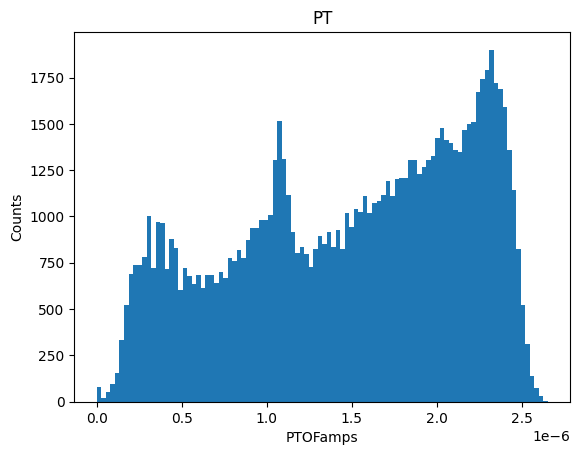

In [11]:
det = 'Z1'
idx = 0
key = series[idx]
c='PT'
mask = (EventCategory[idx] == 0) & (OFamps[key]['Z1'][c] > 0.)
x = OFamps[key]['Z1'][c][mask]
#y = OFchiq[key]['Z1'][c][mask]

plt.figure()
#plt.hist2d(x*1e6,y,norm=mpl.colors.LogNorm(),bins=[100,100], range=[[0,3],[0,100]])
h=plt.hist(x,bins=100)
#plt.hist2d(x*1e6,y,norm=mpl.colors.LogNorm(),bins=[100,100])
#plt.hist2d(events['0V']['PTOFchisq'][mask],events['0V']['PTOFamps'][mask],norm=mpl.colors.LogNorm(),bins=[100,1000], range=[[0,5],[3500,5e5]])
#x = events['0V']['PTOFchisq'][mask]
plt.xlabel('%sOFamps'%(c))
plt.ylabel('Counts')
#plt.yscale('log')
plt.title(c)
#plt.axvline(4.2*10**(-7),c="red")
plt.show()

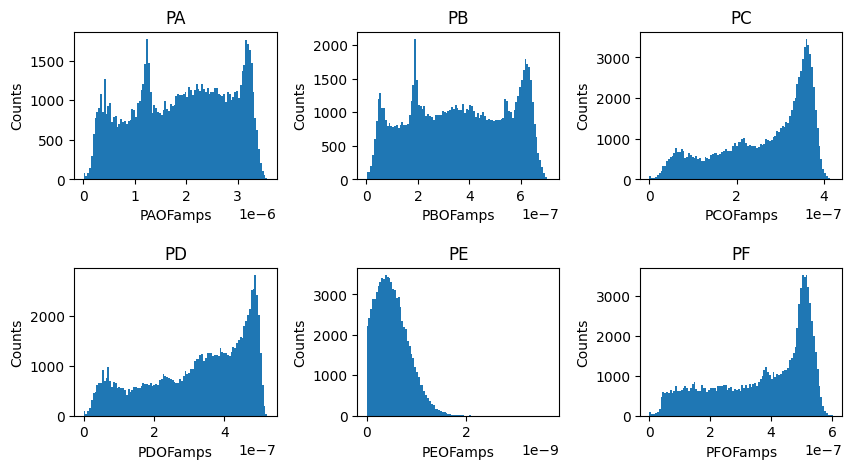

In [12]:
det = 'Z1'
idx = 0
key = series[idx]
fig,ax=plt.subplots(2,3)
i=0;j=0
maxim=[1.5*10**(-6),1*10**(-7)]+[10**(-6)]*4
#fig.tight_layout(pad=3)
for k,ch in enumerate(["A","B","C","D","E","F"]):
    c='P'+ch
    mask = (EventCategory[idx] == 0) & (OFamps[key]['Z1'][c] > 0.)
    x = OFamps[key]['Z1'][c][mask]
    h=ax[i,j].hist(x,bins=100)#np.linspace(0,maxim[k],100))
    ax[i,j].set_xlabel('%sOFamps'%(c))
    ax[i,j].set_ylabel('Counts')
    ax[i,j].set_title(c)
    if j!=2:
        j+=1
    else:
        i+=1
        j=0
plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=1.2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()

In [13]:
det = 'Z1'
gains=[]
for key in series:
    t = {}
    temp = OFamps[key]['Z1']['PA']
    for c in channels:
        if(c == 'PE' or c == 'PA'):
            continue
    temp += OFamps[key]['Z1'][c]
    t[key] = temp
PT = temp

# Start Calibration

/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


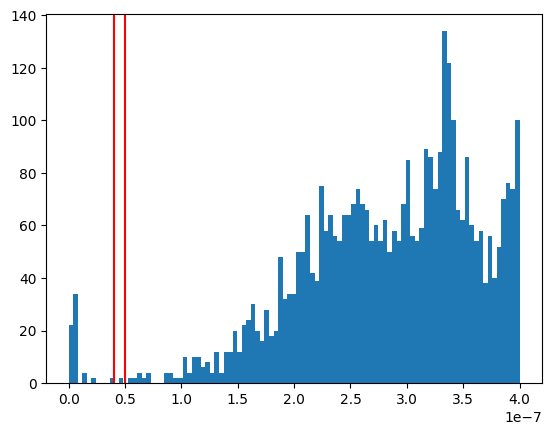

(array([2.00000000e+00, 4.44444664e-08, 5.33835555e-10]), 1557852.3378171423)

In [17]:
from scipy.optimize import curve_fit
left=0.4e-7
right=0.5e-7
channel="A"
c="P"+channel
mask = (EventCategory[idx] == 0) & (OFamps[key]['Z1'][c] > 0.) & dynamic_mask
#(OFchiq[key]['Z1'][c] < np.quantile(OFchiq[key]['Z1']['P'+channel][(OFamps[key]['Z1'][c] > left)&(OFamps[key]['Z1'][c] < right)],0.7))# & \
#(OFchiq[key]['Z1'][c] > np.quantile(OFchiq[key]['Z1']['P'+channel][(OFamps[key]['Z1'][c] > left)&(OFamps[key]['Z1'][c] < right)],0.1))
def gaussian(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
h=plt.hist(OFamps[key]['Z1']['P'+channel][mask],bins=np.linspace(0e-6,4e-7,100))
y=h[0];x=h[1][:-1]
x14=x[(x>left) & (x<right)]
y14=y[(x>left) & (x<right)]
popt,pcov = curve_fit(gaussian, x14, y14, p0=[150,right,right/5],maxfev=30000)
plt.axvline(left,c="r")
plt.axvline(right,c="r")
plt.show()
#plt.hist(OFchiq[key]['Z1']['P'+channel][(OFamps[key]['Z1'][c] > left)&(OFamps[key]['Z1'][c] < right)],bins=30)
#plt.show()
popt,np.quantile(OFchiq[key]['Z1']['P'+channel][(OFamps[key]['Z1'][c] > left)&(OFamps[key]['Z1'][c] < right)],0.7)
# A x0: 3.26668690e-07, 4.10333410e-07, 1.21988664e-06
# B x0: 4.46393709e-08, 5.59690132e-08, 1.89410191e-07
# C x0: 6.21910809e-08, 7.32473858e-08, 2.14053744e-07
# D x0: 5.51238192e-08, 6.96326796e-08, 2.35658947e-07
# F x0: 1.16970912e-07, 1.43931655e-07, 3.82778664e-07

In [18]:
def saturation(E_obs,alpha,m):
    return m*np.log(alpha/(alpha-E_obs))
xcalA=np.array([3.26668690e-07, 4.10333410e-07, 1.21988664e-06])
xcalB=np.array([4.44878492e-08, 5.59690132e-08, 1.89410191e-07])
xcalC=np.array([6.21910809e-08, 7.32473858e-08, 2.14053744e-07])
xcalD=np.array([5.51238192e-08, 6.96326796e-08, 2.35658947e-07])
xcalF=np.array([1.16970912e-07, 1.43931655e-07, 3.82778664e-07])
ycal=np.array([13.8,17.7,59.4])
poptcalA,pcovcal = curve_fit(saturation, xcalA, ycal, p0=[1e-5,100])
poptcalB,pcovcal = curve_fit(saturation, xcalB, ycal, p0=[1e-5,100])
poptcalC,pcovcal = curve_fit(saturation, xcalC, ycal, p0=[1e-5,100])
poptcalD,pcovcal = curve_fit(saturation, xcalD, ycal, p0=[1e-5,100])
poptcalF,pcovcal = curve_fit(saturation, xcalF, ycal, p0=[1e-5,100])
poptcalA,poptcalB,poptcalC,poptcalD,poptcalF

/tmp/ipykernel_1095688/1141958973.py:2: RuntimeWarning: invalid value encountered in log
  return m*np.log(alpha/(alpha-E_obs))


(array([3.94257775e-06, 1.60451746e+02]),
 array([5.53563641e-04, 1.73594014e+05]),
 array([5.41145759e-07, 1.18003253e+02]),
 array([2.27113420e-03, 5.72616871e+05]),
 array([7.30522194e-07, 8.00258161e+01]))

In [16]:
def multi_step(step_list,in_fill=True,alpha=0.5):
    """
    Input list of plt.step inputs to add, and stack their output
    """
    x_arr=np.array([])
    for step in step_list:
        x_arr=np.append(x_arr,step[0])
    x_arr=np.sort(np.unique(x_arr))
    y_arr=np.zeros(len(x_arr))
    for j,x in enumerate(x_arr):
        for step in step_list:
            for i in range(len(step[0])):
                if i+1!=len(step[0]):
                    if x>=step[0][i] and x<step[0][i+1]:
                        y_arr[j]+=step[1][i]
                else:
                    if x==step[0][i]:
                        y_arr[j]+=step[1][i]
    if in_fill:
        plt.fill_between(x_arr,y_arr,step="pre",alpha=alpha)
    plt.step(x_arr,y_arr)
    return x_arr,y_arr

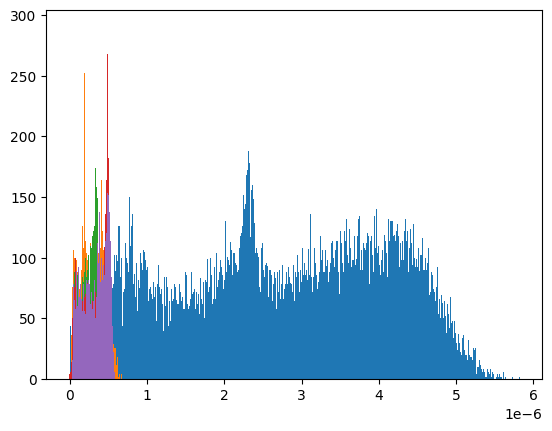

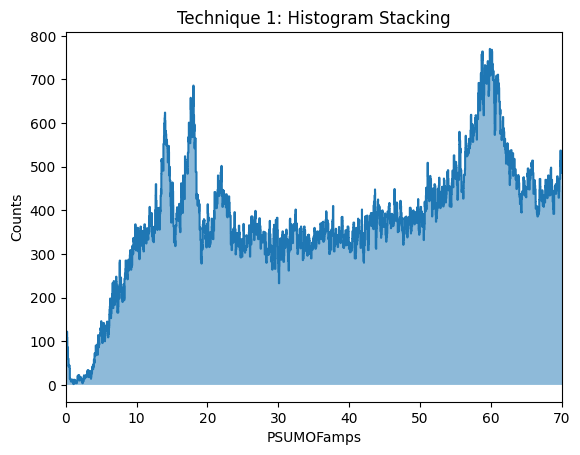

In [40]:
def c_mask(c): 
    return (EventCategory[idx] == 0) & (OFamps[key]['Z1']["PT"] > 0.) & \
    (OFchiq[key]['Z1']["PA"] < np.quantile(OFchiq[key]['Z1']["PA"],0.7)) & \
    (OFchiq[key]['Z1']["PB"] < np.quantile(OFchiq[key]['Z1']["PB"],0.7)) & \
    (OFchiq[key]['Z1']["PC"] < np.quantile(OFchiq[key]['Z1']["PC"],0.7)) & \
    (OFchiq[key]['Z1']["PD"] < np.quantile(OFchiq[key]['Z1']["PD"],0.7)) & \
    (OFchiq[key]['Z1']["PF"] < np.quantile(OFchiq[key]['Z1']["PF"],0.7))
hA=plt.hist(OFamps[key]['Z1']['PA'][c_mask("PA")],bins=800)
hB=plt.hist(OFamps[key]['Z1']['PB'][c_mask("PB")],bins=800)
hC=plt.hist(OFamps[key]['Z1']['PC'][c_mask("PC")],bins=800)
hD=plt.hist(OFamps[key]['Z1']['PD'][c_mask("PD")],bins=800)
hF=plt.hist(OFamps[key]['Z1']['PF'][c_mask("PF")],bins=800)
plt.show()
x_arr,y_arr=multi_step([[saturation(hA[1][:-1],poptcalA[0],poptcalA[1]),hA[0]],
           [saturation(hB[1][:-1],poptcalB[0],poptcalB[1]),hB[0]],
           [saturation(hC[1][:-1],poptcalC[0],poptcalC[1]),hC[0]],
           [saturation(hD[1][:-1],poptcalD[0],poptcalD[1]),hD[0]],
           [saturation(hF[1][:-1],poptcalF[0],poptcalF[1]),hF[0]]])
plt.xlim(0,70)
plt.xlabel("PSUMOFamps")
plt.ylabel("Counts")
plt.title("Technique 1: Histogram Stacking")
plt.show()

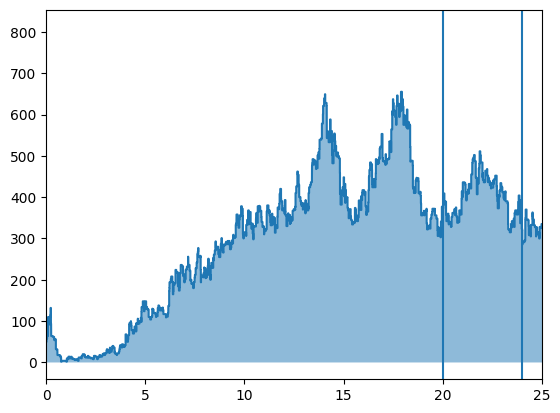

array([444.35367189,  21.986772  ,   2.50974248])

In [19]:
left_21=20
right_21=24
x_21=x_arr[(x_arr>left_21)&(x_arr<right_21)]
y_21=y_arr[(x_arr>left_21)&(x_arr<right_21)]
popt,pcov = curve_fit(gaussian, x_21, y_21, p0=[500,21,1])
plt.fill_between(x_arr,y_arr,step="pre",alpha=0.5)
plt.step(x_arr,y_arr)
plt.axvline(left_21)
plt.axvline(right_21)
plt.xlim(0,25)
plt.show()
popt

In [20]:
ycal2=np.array([13.8/5,17.7/5,59.4/5])
poptcalA2,pcovcal = curve_fit(saturation, xcalA, ycal2, p0=[1e-5,540])
poptcalB2,pcovcal = curve_fit(saturation, xcalB, ycal2, p0=[1e-6,140])
poptcalC2,pcovcal = curve_fit(saturation, xcalC, ycal2, p0=[1e-6,140],maxfev=300000)
poptcalD2,pcovcal = curve_fit(saturation, xcalD, ycal2, p0=[1e-6,140])
poptcalF2,pcovcal = curve_fit(saturation, xcalF, ycal2, p0=[1e-6,140])
poptcalA2,poptcalB2,poptcalC2,poptcalD2,poptcalF2

/tmp/ipykernel_1095688/1141958973.py:2: RuntimeWarning: invalid value encountered in log
  return m*np.log(alpha/(alpha-E_obs))


(array([3.94257768e-06, 3.20903485e+01]),
 array([3.61448244e-04, 2.26676967e+04]),
 array([5.41145751e-07, 2.36006501e+01]),
 array([9.02872852e-04, 4.55246770e+04]),
 array([7.30522193e-07, 1.60051632e+01]))

In [41]:
OFamps["07240206_1402"]["Z1"]#["PA"]

{'PA': array([2.16752264e-06, 7.92188290e-07, 4.54466901e-06, ...,
        5.38286568e-06, 3.44432657e-06, 2.35830420e-06]),
 'PB': array([1.88686762e-07, 5.60981438e-08, 4.69860966e-07, ...,
        6.16179237e-07, 3.85218524e-07, 2.34711539e-07]),
 'PC': array([1.81833127e-07, 7.54742826e-08, 3.15325578e-07, ...,
        3.52928542e-07, 2.44209585e-07, 3.03727894e-07]),
 'PD': array([2.23978433e-07, 6.95436690e-08, 4.90641392e-07, ...,
        3.80207905e-07, 4.69276272e-07, 2.14184408e-07]),
 'PE': array([ 8.16974784e-10,  9.98610233e-10, -2.64790407e-10, ...,
        -1.95742461e-10,  2.83243288e-10,  8.57066351e-10]),
 'PF': array([3.43249404e-07, 1.47372966e-07, 5.37284945e-07, ...,
        5.31483691e-07, 3.54113518e-07, 2.61668247e-07]),
 'PT': array([1.00008231e-06, 3.72563313e-07, 2.04558181e-06, ...,
        2.30954829e-06, 1.53578935e-06, 1.07711101e-06])}

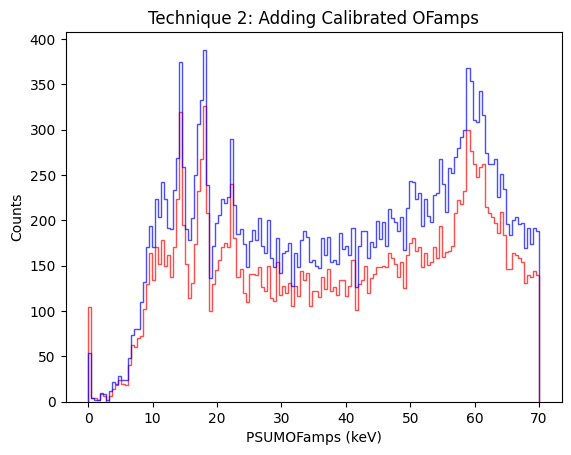

In [32]:
temp1=OFamps[key]['Z1']['PA'][dynamic_mask]*0
temp2=OFamps[key]['Z1']['PA'][c_mask("")]*0
poptcal2={"PA":poptcalA2,"PB":poptcalB2,"PC":poptcalC2,"PD":poptcalD2,"PF":poptcalF2}
for key in series:
    t = {}
    for c in channels:
        if(c == 'PE' or c=="PT"):
            continue
        #saturation(hC[1][:-1],poptcalC[0],poptcalC[1])  
        #if(c!="PA"):
        temp1 += saturation(OFamps[key]['Z1'][c][dynamic_mask],poptcal2[c][0],poptcal2[c][1])
        temp2 += saturation(OFamps[key]['Z1'][c][c_mask("")],poptcal2[c][0],poptcal2[c][1])
        #plt.hist(OFamps[key]['Z1'][c]/gains[c],bins=np.linspace(0,2,100))
        #plt.show()
    t[key] = temp
PT1 = temp1
PT2 = temp2
plt.hist(PT1,bins=np.linspace(0,70,150),color="red",histtype="step",alpha=0.7)
plt.hist(PT2,bins=np.linspace(0,70,150),color="blue",histtype="step",alpha=0.7)
plt.xlabel("PSUMOFamps (keV)")
plt.ylabel("Counts")
plt.title("Technique 2: Adding Calibrated OFamps")
#plt.axvline(20.8,c="red")
plt.show()

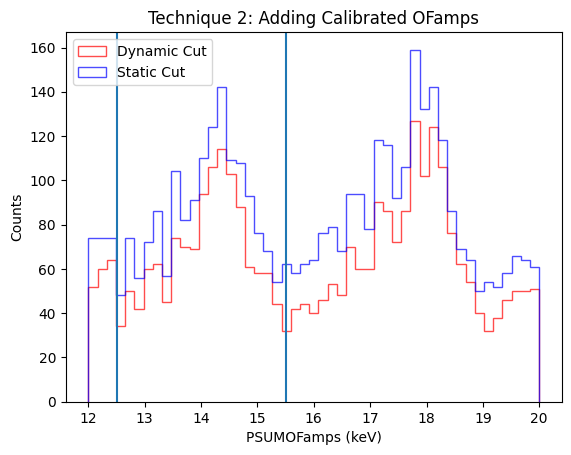

(array([61.41687058, 14.23467914,  0.36375711, 49.28164135]),
 array([61.49168826, 14.23418272,  0.38324753, 67.01814661]),
 1.24624239162267,
 0.9175378814350797)

In [40]:
def offset_gaussian(x,a,x0,sigma,b):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))+b
h1=plt.hist(PT1,bins=np.linspace(12,20,50),color="red",histtype="step",alpha=0.7,label="Dynamic Cut")
h2=plt.hist(PT2,bins=np.linspace(12,20,50),color="blue",histtype="step",alpha=0.7,label="Static Cut")
plt.xlabel("PSUMOFamps (keV)")
plt.ylabel("Counts")
plt.title("Technique 2: Adding Calibrated OFamps")
plt.axvline(12.5)
plt.axvline(15.5)
y1=h1[0];x1=h1[1][:-1]
y2=h2[0];x2=h2[1][:-1]
x14_1=x1[(x1>12.5) & (x1<15.5)]
x14_2=x2[(x2>12.5) & (x2<15.5)]
y14_1=y1[(x1>12.5) & (x1<15.5)]
y14_2=y2[(x2>12.5) & (x2<15.5)]
popt1,pcov = curve_fit(offset_gaussian, x14_1, y14_1, p0=[100,13,1,50],maxfev=30000)
popt2,pcov = curve_fit(offset_gaussian, x14_2, y14_2, p0=[60,13,1,50],maxfev=30000)
plt.legend()
plt.show()
popt1,popt2,popt1[0]/popt1[-1],popt2[0]/popt2[-1]

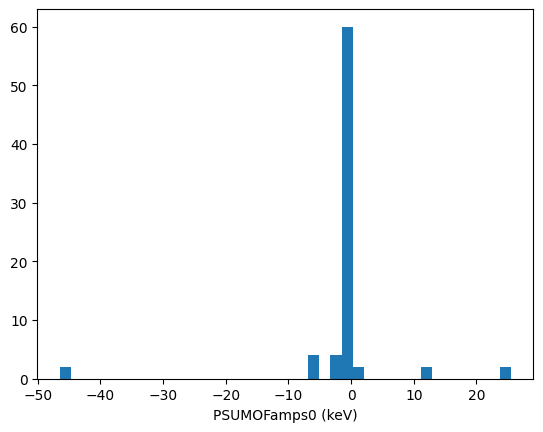

(1.4227594249159314, 76)

In [57]:
def saturation_sign_agnostic(E_obs,alpha,m):
    return m*np.log(alpha/(alpha-np.abs(E_obs)))*np.sign(E_obs)
"""
mask = (EventCategory[idx] == 1)
idx = 0
key = series[idx]
det = 'Z1'
zero_thresh=dict() # zero-point energy
for c in ["PA","PB","PC","PD","PF"]:
    zero_thresh[c]=np.std(OFamps0[key]["Z1"][c][mask])
"""
mask = (EventCategory[idx] == 1)
idx = 0
key = series[idx]
det = 'Z1'
zero_thresh=dict() # zero-point energy
zero_PSUM=0*OFamps0[key]["Z1"]["PA"][mask]
for c in ["PA","PB","PC","PD","PF"]:
    if c=="PA":
        optcal=poptcalA2
    if c=="PB":
        optcal=poptcalB2
    if c=="PC":
        optcal=poptcalC2
    if c=="PD":
        optcal=poptcalD2
    if c=="PF":
        optcal=poptcalF2
    zero_PSUM+=saturation_sign_agnostic(OFamps0[key]["Z1"][c][mask],optcal[0],optcal[1])
plt.hist(zero_PSUM,bins=40)#bins=np.linspace(-10,10,40))
plt.xlabel("PSUMOFamps0 (keV)")
plt.show()
np.std(zero_PSUM[(zero_PSUM>-10)&(zero_PSUM<10)]),len(zero_PSUM)

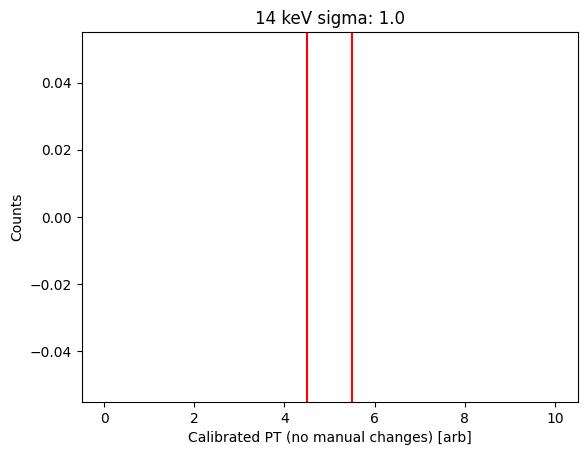

0.9999999993931165

In [58]:
left=4.5
right=5.5
det = 'Z1'
i=0
gains={"PA":6.20750452e-07,"PB":4.44878492e-08,"PC":6.21910809e-08,"PD":5.51238192e-08,"PE":100,"PF":1.16970912e-07}
temp=OFamps[key]['Z1']['PA']*0
#print(temp)
for key in series:
    t = {}
    for c in channels:
        if(c == 'PE' or c=="PT"):
            continue
        temp += OFamps[key]['Z1'][c]/gains[c]
        #plt.hist(OFamps[key]['Z1'][c]/gains[c],bins=np.linspace(0,2,100))
        #plt.show()
    t[key] = temp
PT = temp
h=plt.hist(PT,bins=np.linspace(0,10,100))
y=h[0];x=h[1][:-1]
x14=x[(x>left) & (x<right)]
y14=y[(x>left) & (x<right)]
popt,pcov = curve_fit(gaussian, x14, y14, p0=[150,6,1],maxfev=30000)
plt.axvline(left,c="r")
plt.axvline(right,c="r")
plt.xlabel("Calibrated PT (no manual changes) [arb]")
plt.ylabel("Counts")
plt.title("14 keV sigma: "+str(round(popt[2],3)))
plt.show()
popt[2]

In [49]:
saturation(np.array([1,2,3,4,5,6,7,8,9,9.9999]),10,1)

array([ 0.10536052,  0.22314355,  0.35667494,  0.51082562,  0.69314718,
        0.91629073,  1.2039728 ,  1.60943791,  2.30258509, 11.51292546])

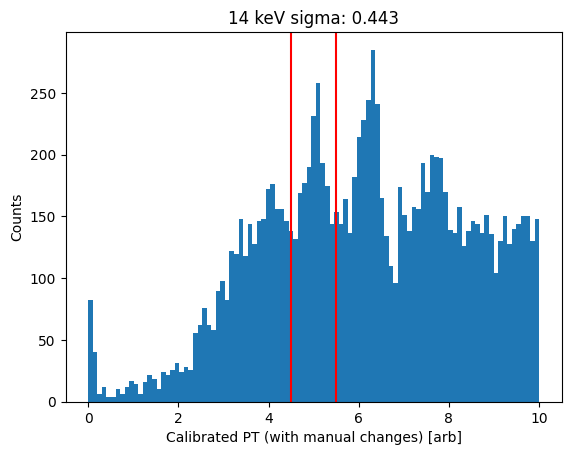

0.44334389048724393

In [17]:
left=4.5
right=5.5
det = 'Z1'
i=0
gains={"PA":6.20750452e-07,"PB":4.44878492e-08,"PC":6.21910809e-08,"PD":5.51238192e-08,"PE":100,"PF":1.16970912e-07}
gains["PA"]*=0.99
gains["PB"]*=1
gains["PC"]*=1.01
gains["PD"]*=1
gains["PF"]*=1
temp=OFamps[key]['Z1']['PA']*0
for key in series:
    t = {}
    for c in channels:
        if(c == 'PE' or c=="PT"):
            continue
        temp += OFamps[key]['Z1'][c]/gains[c]
    t[key] = temp
PT = temp
h=plt.hist(PT,bins=np.linspace(0,10,100))
y=h[0];x=h[1][:-1]
x14=x[(x>left) & (x<right)]
y14=y[(x>left) & (x<right)]
popt,pcov = curve_fit(gaussian, x14, y14, p0=[150,6,1],maxfev=30000)
plt.axvline(left,c="r")
plt.axvline(right,c="r")
plt.xlabel("Calibrated PT (with manual changes) [arb]")
plt.ylabel("Counts")
plt.title("14 keV sigma: "+str(round(popt[2],3)))
plt.show()
popt[2]

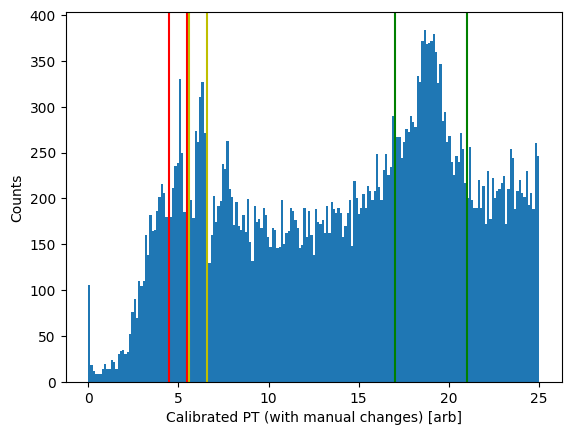

(array([272.67375066,   4.97604468,   0.46396014]),
 array([308.07204923,   6.14053933,   0.4218247 ]),
 array([346.40728798,  18.82311282,   1.95560261]))

In [30]:
left14=4.5
right14=5.5
left18=5.6
right18=6.6
left60=17
right60=21
# keV/A
gains={"PA":6.20750452e-07,"PB":4.44878492e-08,"PC":6.21910809e-08,"PD":5.51238192e-08,"PE":100,"PF":1.16970912e-07}
gains["PA"]*=0.99
gains["PB"]*=1
gains["PC"]*=1.01
gains["PD"]*=1
gains["PF"]*=1
temp=OFamps[key]['Z1']['PA']*0
for key in series:
    t = {}
    for c in channels:
        if(c == 'PE' or c=="PT"):
            continue
        temp += OFamps[key]['Z1'][c]/gains[c]
    t[key] = temp
PT = temp
h=plt.hist(PT,bins=np.linspace(0,25,200))

y=h[0];x=h[1][:-1]
x14=x[(x>left14) & (x<right14)]
y14=y[(x>left14) & (x<right14)]
popt14,pcov14 = curve_fit(gaussian, x14, y14, p0=[150,6,1],maxfev=30000)

x18=x[(x>left18) & (x<right18)]
y18=y[(x>left18) & (x<right18)]
popt18,pcov18 = curve_fit(gaussian, x18, y18, p0=[150,6,0.4],maxfev=30000)

x60=x[(x>left60) & (x<right60)]
y60=y[(x>left60) & (x<right60)]
popt60,pcov60 = curve_fit(gaussian, x60, y60, p0=[150,20,3],maxfev=30000)

plt.xlabel("Calibrated PT (with manual changes) [arb]")
plt.ylabel("Counts")
plt.axvline(left14,c="r")
plt.axvline(right14,c="r")
plt.axvline(left18,c="y")
plt.axvline(right18,c="y")
plt.axvline(left60,c="g")
plt.axvline(right60,c="g")
plt.show()
popt14,popt18,popt60

In [33]:
def saturation(E_obs,alpha,m):
    return m*np.log(alpha/(alpha-E_obs))
xcal=np.array([popt14[1],popt18[1],popt60[1]])
ycal=np.array([13.8,17.7,59.4])
poptcal,pcovcal = curve_fit(saturation, xcal, ycal, p0=[40,1])
poptcal,pcovcal

(array([ 72.37438407, 197.21748924]),
 array([[ 82.0012135 , 257.27110116],
        [257.27110116, 808.20234668]]))

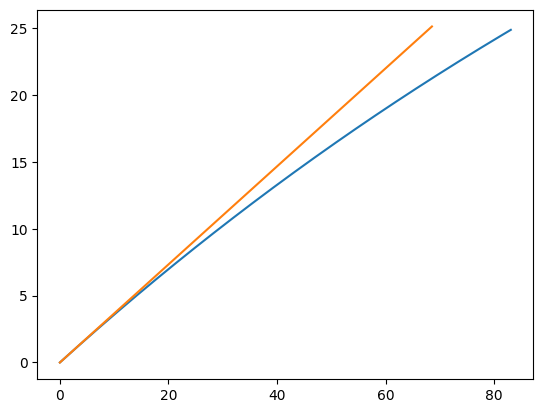

In [52]:
plt.plot(saturation(h[1][:-1],poptcal[0],poptcal[1]),h[1][:-1])
plt.plot([0,(saturation(h[1][:-1],poptcal[0],poptcal[1])[1]-saturation(h[1][:-1],poptcal[0],poptcal[1])[0])*200],[0,(h[1][:-1][1]-h[1][:-1][0])*200])

In [53]:
PT.shape

(94578,)

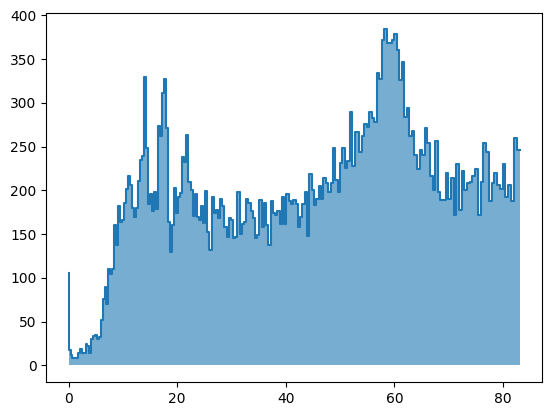

In [47]:
plt.fill_between(saturation(h[1][:-1],poptcal[0],poptcal[1]),h[0],step="pre",alpha=0.6)
plt.step(saturation(h[1][:-1],poptcal[0],poptcal[1]),h[0])
#plt.fill_between(saturation(h[1][:-1],9999,poptcal[1]),h[0],step="pre",alpha=0.6)
#plt.step(saturation(h[1][:-1],9999,poptcal[1]),h[0])
#plt.xlim(1,80)
#plt.axvline(24)

In [43]:
x=saturation(h[1][:-1],poptcal[0],poptcal[1])
y=h[0]
print(x.shape,y.shape)
x20=x[(x>20) & (x<23)]
y20=y[(x>20) & (x<23)]
popt20,pcov20 = curve_fit(gaussian, x20, y20, p0=[150,20,3],maxfev=30000)
popt20

(199,) (199,)


array([239.40215931,  21.77120284,   1.85260342])

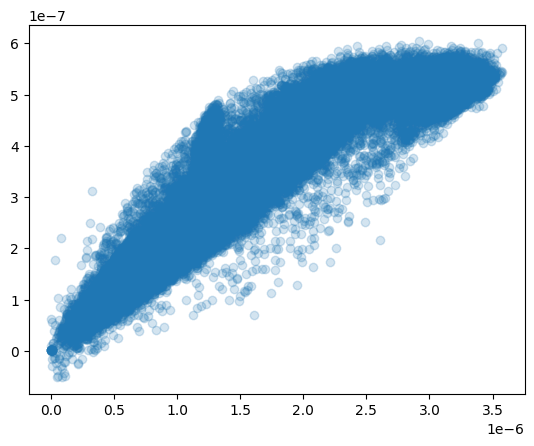

In [26]:
det = 'Z1'
idx = 0
key = series[idx]
c='PA'
mask = (EventCategory[idx] == 0) & (OFamps[key]['Z1'][c] > 0.)
xA = OFamps[key]['Z1']["PA"][mask]
xB = OFamps[key]['Z1']["PB"][mask]
xC = OFamps[key]['Z1']["PC"][mask]
xD = OFamps[key]['Z1']["PD"][mask]
xE = OFamps[key]['Z1']["PE"][mask]
xF = OFamps[key]['Z1']["PF"][mask]
plt.scatter(xA,xF,alpha=0.1)
plt.xlabel("PAOFamps")
plt.ylabel("")

In [33]:
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
def quad_function(x,a,b):
    return a*x**2+b*x
# program
from scipy.optimize import curve_fit
y=h[0];x=h[1][:-1]

x14=x[(x>2.8*10**(-7)) & (x<3.2e-7)]
y14=y[(x>2.8*10**(-7)) & (x<3.2e-7)]
x18=x[(x>3.4*10**(-7)) & (x<3.9e-7)]
y18=y[(x>3.4*10**(-7)) & (x<3.9e-7)]
#x26=x[(x>3.4*10**(-7)) & (x<3.9e-7)]
#y26=y[(x>3.4*10**(-7)) & (x<3.9e-7)]

popt14, pcov14 = curve_fit(gauss_function, x14, y14, p0=[200,3e-7,3e-8])
popt18, pcov18 = curve_fit(gauss_function, x18, y18, p0=[200,3e-7,3e-8])
#popt26, pcov26 = curve_fit(gauss_function, x26, y26, p0=[200,3e-7,3e-8])

poptq,pcovq=curve_fit(quad_function, np.array([popt14[1],popt18[1]]),np.array([13.8,17.7]),p0=[3*10**13,10**5])
quad_function(4.5*10**(-7),poptq[0],poptq[1])

22.82777812908614

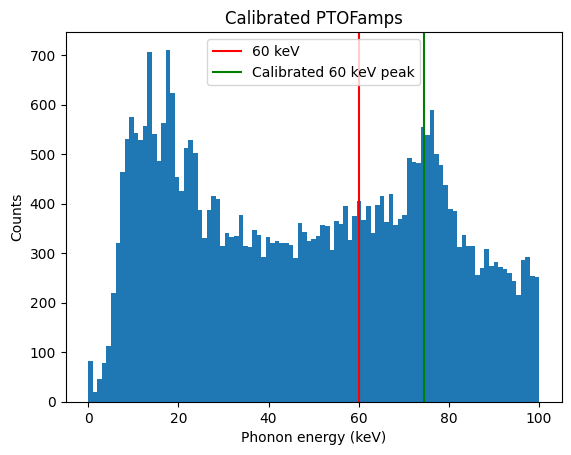

In [35]:
h=plt.hist(quad_function(x,poptq[0],poptq[1]),bins=np.linspace(0,100,100))
plt.title("Calibrated PTOFamps")
plt.xlabel("Phonon energy (keV)")
plt.ylabel("Counts")
plt.axvline(60,c="red",label="60 keV")
plt.axvline(popt80[1],c="green",label="Calibrated 60 keV peak")
plt.legend()
plt.show()

In [30]:
y1=h[0];x1=h[1][:-1]

x60=x[(x1>70) & (x1<80)]
y60=y[(x1>70) & (x1<80)]
popt80, pcov80 = curve_fit(gauss_function, x60, y60, p0=[600,70,10])
popt80

array([547.30041468,  74.50902553,   6.49015999])

Text(0.5, 1.0, 'Calibration')

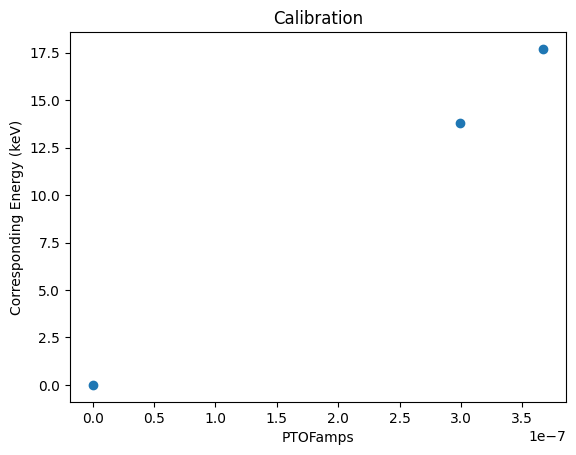

In [18]:
plt.scatter([0,popt14[1],popt18[1]],[0,13.8,17.7])
plt.xlabel("PTOFamps")
plt.ylabel("Corresponding Energy (keV)")
plt.title("Calibration")

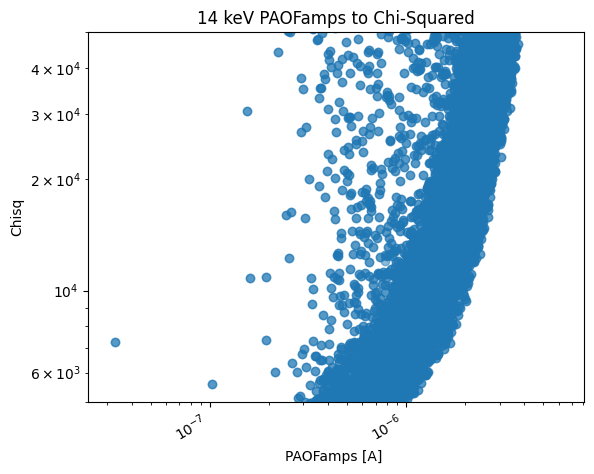

In [57]:
idx = 0
key = series[idx]
c = 'PA'
det = 'Z1'
mask = (EventCategory[idx] == 0) & (OFamps[key]['Z1'][c] > 0.) & (OFamps[key]['Z1'][c]>3*10**(-8))# & (OFamps[key]['Z1'][c]>2.9*10**(-7)) & (OFamps[key]['Z1'][c]<3.1*10**(-7))
x = OFamps[key]['Z1'][c][mask]
y = OFchiq[key]['Z1'][c][mask]

fig,ax=plt.subplots(1,1)
ax.scatter(x.tolist(),y.tolist(),alpha=0.5)
plt.xscale('log')
plt.xlabel('PAOFamps [A] ')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.title("14 keV PAOFamps to Chi-Squared")
plt.yscale('log')
plt.ylabel('Chisq')
#plt.xlim(1e-6,1.3e-6)
plt.ylim(0.5*10**4,5*10**4)
plt.show()

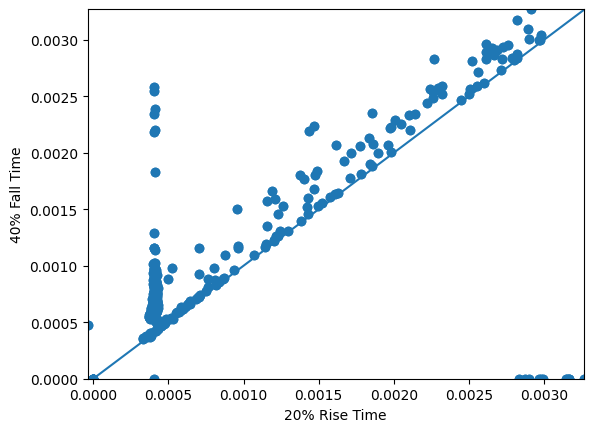

1202

In [16]:
x=WKr20[key]['Z1'][c][mask]
y=WKr40[key]['Z1'][c][mask]
z=WKf40[key]['Z1'][c][mask]
plt.scatter(x,z)
plt.plot([-10,10],[-10,10])
plt.xlim(x.min(),x.max())
plt.ylim(z.min(),z.max())
plt.xlabel("20% Rise Time")
plt.ylabel("40% Fall Time")
plt.show()
len(x[y>x])

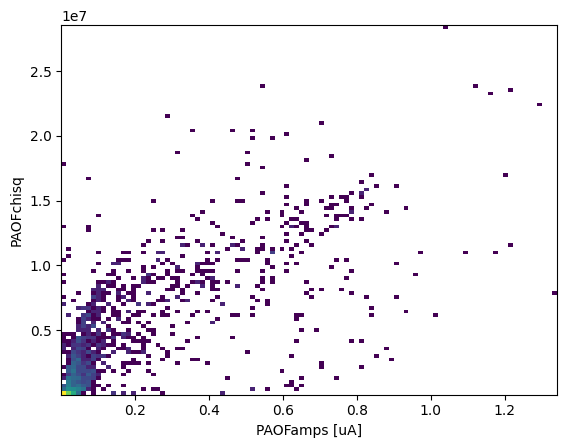

In [10]:
idx = 0
key = series[idx]
c = 'PA'
det = 'Z1'
mask = (EventCategory[idx] == 0) & (OFamps[key]['Z1'][c] > 0.)
x = OFamps[key]['Z1'][c][mask]
y = OFchiq[key]['Z1'][c][mask]

plt.figure()
#plt.hist2d(x*1e6,y,norm=mpl.colors.LogNorm(),bins=[100,100], range=[[0,3],[0,100]])
plt.hist2d(x*1e6,y,norm=mpl.colors.LogNorm(),bins=[100,100])
#plt.hist2d(events['0V']['PTOFchisq'][mask],events['0V']['PTOFamps'][mask],norm=mpl.colors.LogNorm(),bins=[100,1000], range=[[0,5],[3500,5e5]])

#x = events['0V']['PTOFchisq'][mask]
#
plt.xlabel('%sOFamps [uA]'%(c))
plt.ylabel('%sOFchisq'%(c))
plt.show()
#plt.yscale('log')
# plt.xscale('log')

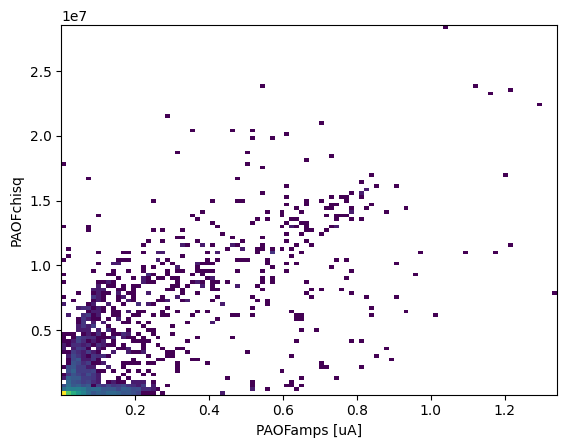

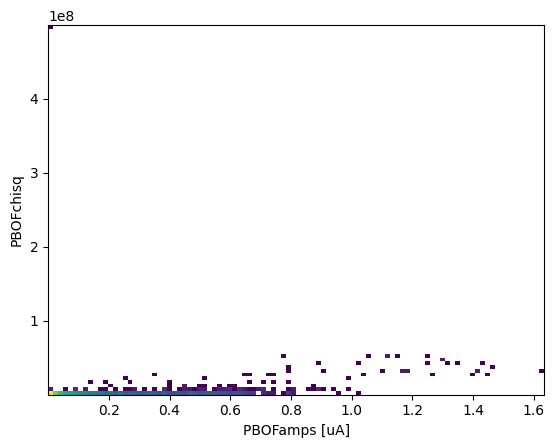

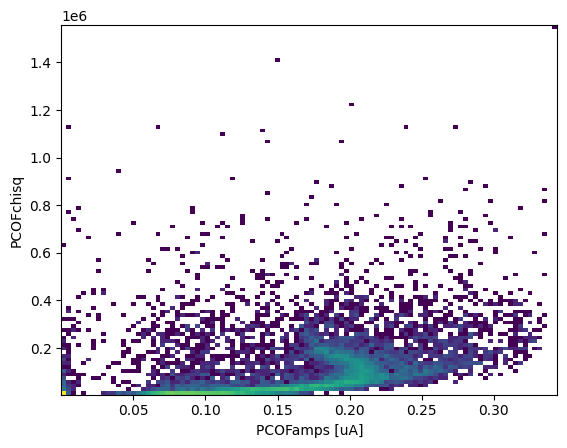

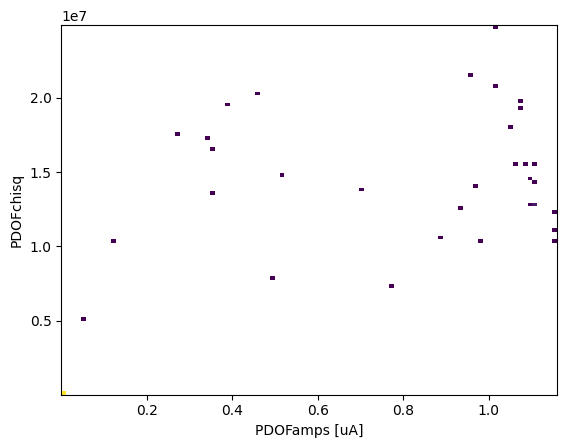

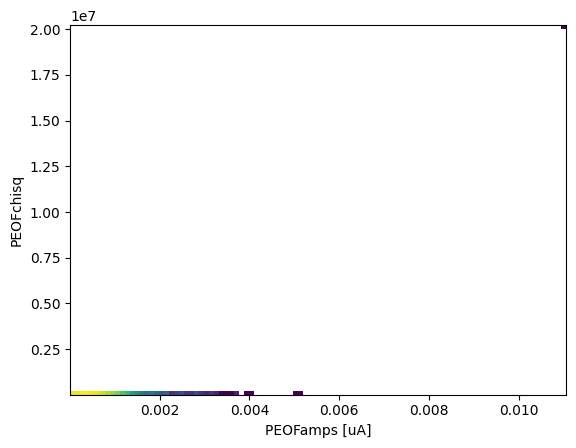

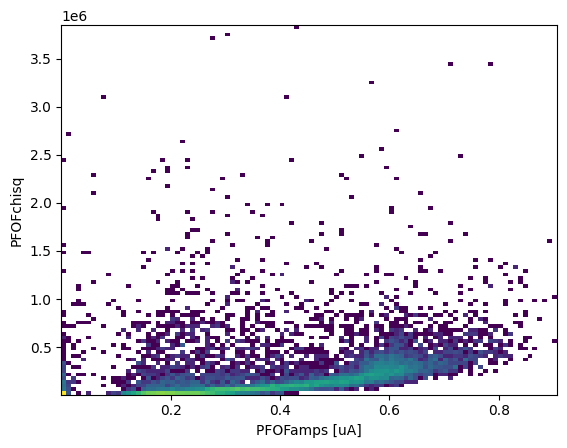

In [20]:
det = 'Z1'

for c in channels:
    if(c == 'PT'):
        continue
    mask = (EventCategory[idx] == 0) & (OFamps[key]['Z1'][c] > 0.)
    x = OFamps[key]['Z1'][c][mask]
    y = OFchiq[key]['Z1'][c][mask]

    plt.figure()
    #plt.hist2d(x*1e6,y,norm=mpl.colors.LogNorm(),bins=[100,100], range=[[0,3],[0,100]])
    plt.hist2d(x*1e6,y,norm=mpl.colors.LogNorm(),bins=[100,100])
    #plt.hist2d(events['0V']['PTOFchisq'][mask],events['0V']['PTOFamps'][mask],norm=mpl.colors.LogNorm(),bins=[100,1000], range=[[0,5],[3500,5e5]])

    #x = events['0V']['PTOFchisq'][mask]
    #
    plt.xlabel('%sOFamps [uA]'%(c))
    plt.ylabel('%sOFchisq'%(c))
    plt.show()

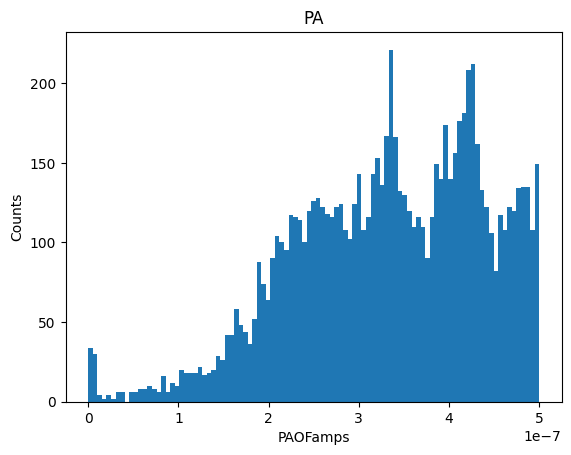

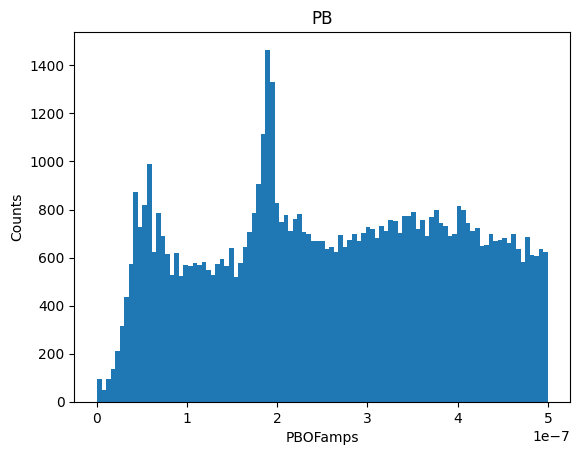

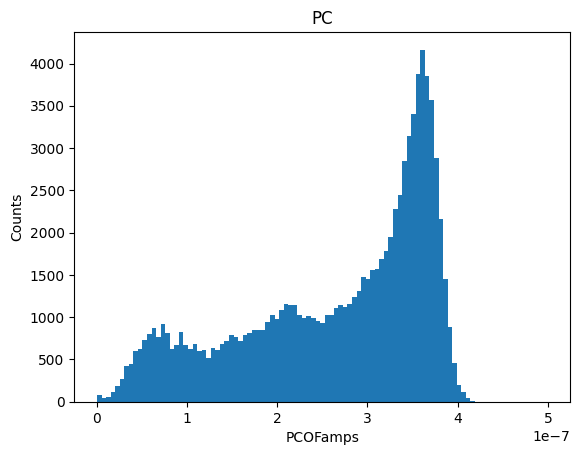

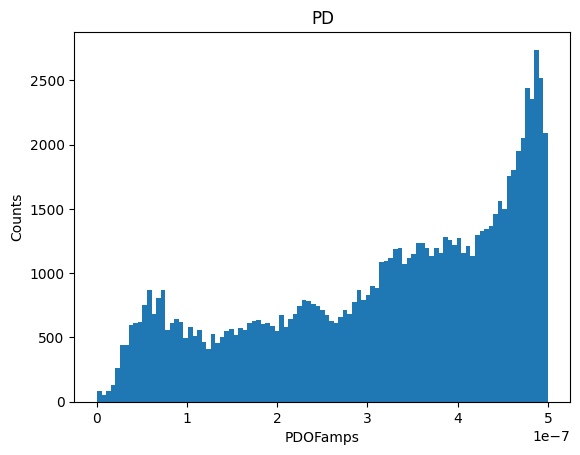

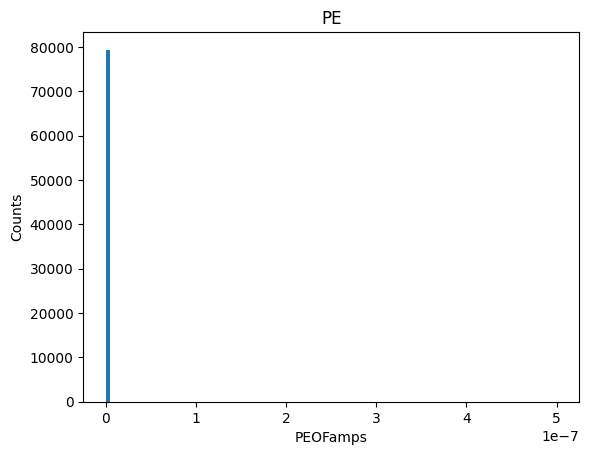

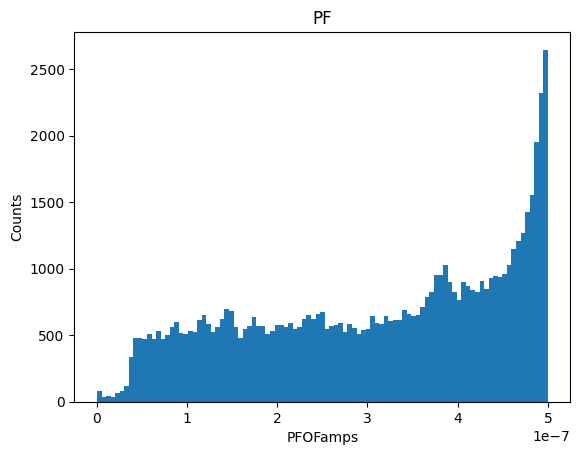

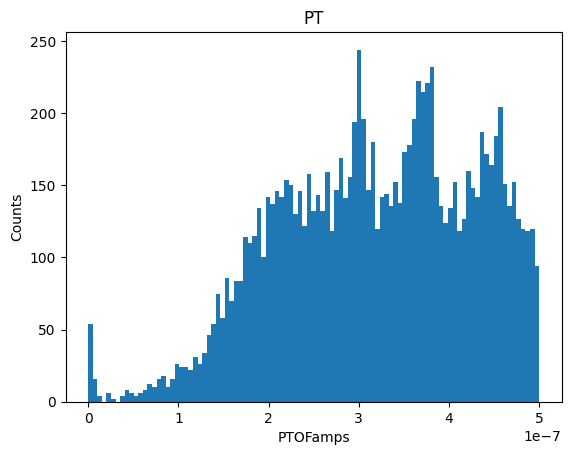

In [32]:
det = 'Z1'
idx = 0
key = series[idx]
for c in channels:
    #if(c == 'PT'):
    #    continue
    mask = (EventCategory[idx] == 0) & (OFamps[key]['Z1'][c] > 0.)
    x = OFamps[key]['Z1'][c][mask]
    #y = OFchiq[key]['Z1'][c][mask]

    plt.figure()
    #plt.hist2d(x*1e6,y,norm=mpl.colors.LogNorm(),bins=[100,100], range=[[0,3],[0,100]])
    plt.hist(x,bins=np.linspace(0,0.5*10**(-6),100))
    #plt.hist2d(x*1e6,y,norm=mpl.colors.LogNorm(),bins=[100,100])
    #plt.hist2d(events['0V']['PTOFchisq'][mask],events['0V']['PTOFamps'][mask],norm=mpl.colors.LogNorm(),bins=[100,1000], range=[[0,5],[3500,5e5]])

    #x = events['0V']['PTOFchisq'][mask]
    #
    plt.xlabel('%sOFamps'%(c))
    plt.ylabel('Counts')
    #plt.yscale('log')
    plt.title(c)
    plt.show()

In [46]:
def deg(angle):
    return angle*(np.pi/180)

det = 'Z1'
print('Calculating triangles......')
CDE_S1_X = {}
CDE_S1_Y = {}
CDE_S2_X = {}
CDE_S2_Y = {}
CDE_S1_X_corr = {}
CDE_S1_Y_corr = {}
CDE_S2_X_corr = {}
CDE_S2_Y_corr = {}

BDF_S1_X = {}
BDF_S1_Y = {}
BDF_S2_X = {}
BDF_S2_Y = {}
BDF_S1_X_corr = {}
BDF_S1_Y_corr = {}
BDF_S2_X_corr = {}
BDF_S2_Y_corr = {}

ADF_S1_X = {}
ADF_S1_Y = {}
ADF_S2_X = {}
ADF_S2_Y = {}
ADF_S1_X_corr = {}
ADF_S1_Y_corr = {}
ADF_S2_X_corr = {}
ADF_S2_Y_corr = {}

asym_par = {}
asym_par_corr = {}

#--------------- From my study ------------
# c1 = 0.75
# d1 = 0.85
# e1 = 0.9


# b1 = 0.8
# f1 = 0.65

# a1 = 0.85

# a1 = a1*1.4
# b1 = b1*1.4
# c1 = c1*1.4
# d1 = d1*1.4
# e1 = e1*1.4
# f1 = f1*1.4

# c2 = 0.85
# d2 = 1.2
# e2 = 1.1

# b2 = 1.2
# f2 = 0.9

# a2 = 1.3
#----------------------------------

#--------------- From Aditi ------------
### original ###
# a1 = 1.1849
# b1 = 0.9570
# c1 = 0.9115
# d1 = 1.0482
# e1 = 0.8659
# f1 = 0.7292

# a2 = 1.2351
# b2 = 1.0477
# c2 = 0.8518
# d2 = 1.2948
# e2 = 1.0222
# f2 = 0.8518
###############



a1 = 1.0
b1 = 1.0
c1 = 1.0
d1 = 1.0
e1 = 1.0
f1 = 1.0

a2 = 1.0
b2 = 1.0
c2 = 1.0
d2 = 1.0
e2 = 1.0
f2 = 1.0

#---------------------------------------
reweight = 1.0


for idx, key in enumerate(series):
    A1_def = OFamps[key][det]['PA']
    B1_def = OFamps[key][det]['PB']
    C1_def = OFamps[key][det]['PC']
    D1_def = OFamps[key][det]['PD']
    E1_def = OFamps[key][det]['PE']
    F1_def = OFamps[key][det]['PF']

    A2_def = 1.0
    B2_def = 1.0
    C2_def = 1.0
    D2_def = 1.0
    E2_def = 1.0
    F2_def = 1.0
    
    A1 = a1*A1_def
    B1 = b1*B1_def
    C1 = c1*C1_def
    D1 = d1*D1_def
    E1 = e1*E1_def
    F1 = f1*F1_def
    
    A2 = a2*A2_def
    B2 = b2*B2_def
    C2 = c2*C2_def
    D2 = d2*D2_def
    E2 = e2*E2_def
    F2 = f2*F2_def
    
    bdf_s1_x = (F1_def*np.cos(deg(0)) + B1_def*np.cos(deg(120)) + D1_def*np.cos(deg(240)))/(F1_def+B1_def+D1_def)
    bdf_s1_y = (F1_def*np.sin(deg(0)) + B1_def*np.sin(deg(120)) + D1_def*np.sin(deg(240)))/(F1_def+B1_def+D1_def)
    bdf_s2_x = (B2_def*np.cos(deg(0+60)) + F2_def*np.cos(deg(120+60)) + D2_def*np.cos(deg(240+60)))/(F2_def+B2_def+D2_def)
    bdf_s2_y = (B2_def*np.sin(deg(0+60)) + F2_def*np.sin(deg(120+60)) + D2_def*np.sin(deg(240+60)))/(F2_def+B2_def+D2_def)
    BDF_S1_X[key] = np.array(bdf_s1_x)
    BDF_S1_Y[key] = np.array(bdf_s1_y)
    BDF_S2_X[key] = np.array(bdf_s2_x)
    BDF_S2_Y[key] = np.array(bdf_s2_y)

    bdf_s1_x = (F1*np.cos(deg(0)) + B1*np.cos(deg(120)) + D1*np.cos(deg(240)))/(F1+B1+D1)
    bdf_s1_y = (F1*np.sin(deg(0)) + B1*np.sin(deg(120)) + D1*np.sin(deg(240)))/(F1+B1+D1)
    bdf_s2_x = (B2*np.cos(deg(0+60)) + F2*np.cos(deg(120+60)) + D2*np.cos(deg(240+60)))/(F2+B2+D2)
    bdf_s2_y = (B2*np.sin(deg(0+60)) + F2*np.sin(deg(120+60)) + D2*np.sin(deg(240+60)))/(F2+B2+D2)
    BDF_S1_X_corr[key] = np.array(bdf_s1_x)
    BDF_S1_Y_corr[key] = np.array(bdf_s1_y)
    BDF_S2_X_corr[key] = np.array(bdf_s2_x)
    BDF_S2_Y_corr[key] = np.array(bdf_s2_y)
    
    
    cde_s1_x = (E1_def*np.cos(deg(0)) + C1_def*np.cos(deg(120)) + D1_def*np.cos(deg(240)))/(E1_def+C1_def+D1_def)
    cde_s1_y = (E1_def*np.sin(deg(0)) + C1_def*np.sin(deg(120)) + D1_def*np.sin(deg(240)))/(E1_def+C1_def+D1_def)
    cde_s2_x = (C2_def*np.cos(deg(0+60)) + E2_def*np.cos(deg(120+60)) + D2_def*np.cos(deg(240+60)))/(E2_def+C2_def+D2_def)
    cde_s2_y = (C2_def*np.sin(deg(0+60)) + E2_def*np.sin(deg(120+60)) + D2_def*np.sin(deg(240+60)))/(E2_def+C2_def+D2_def)
    CDE_S1_X[key] = np.array(cde_s1_x)
    CDE_S1_Y[key] = np.array(cde_s1_y)
    CDE_S2_X[key] = np.array(cde_s2_x)
    CDE_S2_Y[key] = np.array(cde_s2_y)

    cde_s1_x = (E1*np.cos(deg(0)) + C1*np.cos(deg(120)) + D1*np.cos(deg(240)))/(E1+C1+D1)
    cde_s1_y = (E1*np.sin(deg(0)) + C1*np.sin(deg(120)) + D1*np.sin(deg(240)))/(E1+C1+D1)
    cde_s2_x = (C2*np.cos(deg(0+60)) + E2*np.cos(deg(120+60)) + D2*np.cos(deg(240+60)))/(E2+C2+D2)
    cde_s2_y = (C2*np.sin(deg(0+60)) + E2*np.sin(deg(120+60)) + D2*np.sin(deg(240+60)))/(E2+C2+D2)
    CDE_S1_X_corr[key] = np.array(cde_s1_x)
    CDE_S1_Y_corr[key] = np.array(cde_s1_y)
    CDE_S2_X_corr[key] = np.array(cde_s2_x)
    CDE_S2_Y_corr[key] = np.array(cde_s2_y)
    
    adf_s1_x = (F1_def*np.cos(deg(0)) + A1_def*np.cos(deg(120)) + D1_def*np.cos(deg(240)))/(F1_def+A1_def+D1_def)
    adf_s1_y = (F1_def*np.sin(deg(0)) + A1_def*np.sin(deg(120)) + D1_def*np.sin(deg(240)))/(F1_def+A1_def+D1_def)
    adf_s2_x = (A2_def*np.cos(deg(0+60)) + F2_def*np.cos(deg(120+60)) + D2_def*np.cos(deg(240+60)))/(F2_def+A2_def+D2_def)
    adf_s2_y = (A2_def*np.sin(deg(0+60)) + F2_def*np.sin(deg(120+60)) + D2_def*np.sin(deg(240+60)))/(F2_def+A2_def+D2_def)
    ADF_S1_X[key] = np.array(adf_s1_x)
    ADF_S1_Y[key] = np.array(adf_s1_y)
    ADF_S2_X[key] = np.array(adf_s2_x)
    ADF_S2_Y[key] = np.array(adf_s2_y)

    adf_s1_x = (F1*np.cos(deg(0)) + A1*np.cos(deg(120)) + D1*np.cos(deg(240)))/(F1+A1+D1)
    adf_s1_y = (F1*np.sin(deg(0)) + A1*np.sin(deg(120)) + D1*np.sin(deg(240)))/(F1+A1+D1)
    adf_s2_x = (A2*np.cos(deg(0+60)) + F2*np.cos(deg(120+60)) + D2*np.cos(deg(240+60)))/(F2+A2+D2)
    adf_s2_y = (A2*np.sin(deg(0+60)) + F2*np.sin(deg(120+60)) + D2*np.sin(deg(240+60)))/(F2+A2+D2)
    ADF_S1_X_corr[key] = np.array(adf_s1_x)
    ADF_S1_Y_corr[key] = np.array(adf_s1_y)
    ADF_S2_X_corr[key] = np.array(adf_s2_x)
    ADF_S2_Y_corr[key] = np.array(adf_s2_y)
    
    s1 = A1_def + B1_def + C1_def + D1_def + E1_def + F1_def
    s2 = A2_def + B2_def + C2_def + D2_def + E2_def + F2_def
    asym_par[key] = (s1 - s2)/(s1 + s2)
    s1 = A1 + B1 + C1 + D1 + E1 + F1
    s1 = s1*reweight
    s2 = A2 + B2 + C2 + D2 + E2 + F2
    
    asym_par_corr[key] = (s1 - s2)/(s1 + s2)
    
    print('%s done'%(key))

Calculating triangles......
07240205_1718 done
07240206_1832 done


In [ ]:
def compute_triangle(X,Y,low,high,chiq,detNum,chan):
    x = np.array([])
    y = np.array([])
    chan = 'PT'
    
    for idx, key in enumerate(series):
        #mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 25e-6) & (OFamps[key][chan] < 32e-6) & (OFchiq[key][chan] < 5e5)
        mask = (TriggerType[idx] == 1) & (TrigDet[idx] == detNum) & (OFamps[key][chan] > low) & (OFamps[key][chan] < high) & (OFchiq[key][chan] < 5e5)
        x = np.append(x,X[key][mask])
        y = np.append(y,Y[key][mask])
    return(x,y)

In [54]:
len(CDE_S1_X[key])

13189

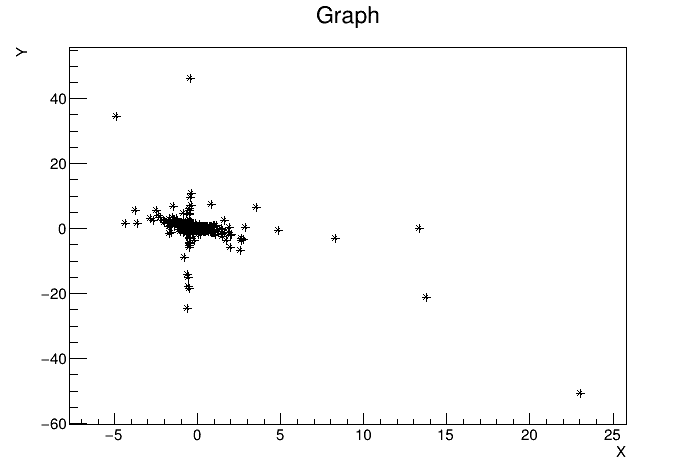

In [55]:
idx = 0
key = series[idx]
det = 'Z1'

mask = (EventCategory[idx] == 0) & (CDE_S1_X[key] > -10) #& (OFamps[key]['Z1']['PC'] < 0.1e-6) & (OFamps[key]['Z1']['PC'] > 0.)
x = CDE_S1_X[key][mask]
y = CDE_S1_Y[key][mask]

can = rt.TCanvas()
gr = rt.TGraph(len(x),x,y)
gr.SetMarkerStyle(rt.kFullDotMedium)
#gr.SetMarkerSize(2)
#gr.SetMarkerStyle(rt.kCircle)
gr.GetXaxis().SetTitle('X')
gr.GetYaxis().SetTitle('Y')
# gr.SetTitle('Around 1.3 keV line (S1) C-D-E')
# gr.GetYaxis().SetRangeUser(-0.5,0.5)
# gr.GetXaxis().SetRangeUser(-0.5,1.0)

gr.Draw('AP*')
can.Draw()

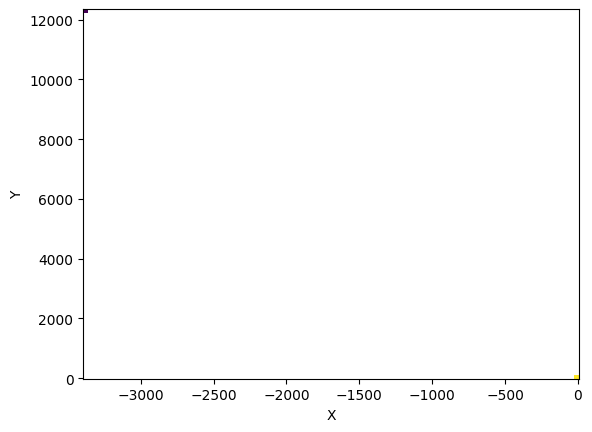

In [48]:
idx = 0
key = series[idx]
det = 'Z1'

mask = (EventCategory[idx] == 0) & (OFamps[key]['Z1']['PC'] < 0.1e-6) & (OFamps[key]['Z1']['PC'] > 0.)
x = CDE_S1_X[key][mask]
y = CDE_S1_Y[key][mask]

plt.figure()
#plt.hist2d(x*1e6,y,norm=mpl.colors.LogNorm(),bins=[100,100], range=[[0,3],[0,100]])
plt.hist2d(x,y,norm=mpl.colors.LogNorm(),bins=[100,100])
#plt.hist2d(events['0V']['PTOFchisq'][mask],events['0V']['PTOFamps'][mask],norm=mpl.colors.LogNorm(),bins=[100,1000], range=[[0,5],[3500,5e5]])

#x = events['0V']['PTOFchisq'][mask]
#
plt.xlabel('X')
plt.ylabel('Y')
plt.show()